# Import Libraries and Datasets

In [ ]:
# Import Necessary Libraries
import re
import string
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from timeit import default_timer as timer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Import SNMPTN 2016 Dataset
url_2016 = '<Insert Dataset Link Here>'
file_id_2016 = url_2016.split('/')[-2]
csv_url_2016 = 'https://drive.google.com/uc?id=' + file_id_2016
df_2016 = pd.read_excel(csv_url_2016)

In [ ]:
df_2016

,Nama Panggilan,Asal Sekolah,Jurusan Sekolah,Jenis Sekolah,Jenis Kelas,Akreditasi Sekolah,Prestasi Sekolah,Alumni Sekolah,PTN Pilihan I,Jurusan Pilihan I di PTN Pilihan I,...,Kom Sem 4,Kom Sem 5,Peringkat Kelas Sem 1,Peringkat Kelas Sem 2,Peringkat Kelas Sem 3,Peringkat Kelas Sem 4,Peringkat Kelas Sem 5,Nilai UN,Saran buat adik kelas,Prestasi lain yang dilampirkan
0,Indy,Sman 28 Jakarta,IPS,SMA,Reguler,A,Sekolah gue PALING berprestasi se-kota/kabupat...,Alumni sekolah gue di PTN tempat gue diterima ...,UI,administrasi niaga,...,NaN,NaN,10 - 6,15 - 11,20 - 16,15 - 11,5 - 1,521,NaN,NaN
1,Nabilah,SMAN 13 Jakarta,IPS,SMA,Reguler,A,Sekolah gue PALING berprestasi se-kota/kabupat...,Alumni sekolah gue di PTN tempat gue diterima ...,UI,Sastra Jepang,...,No data,No data,5 - 1,5 - 1,5 - 1,5 - 1,5 - 1,459,Jangan sombong,NaN
2,rai,sman 70,IPA,SMA,Reguler,A,Sekolah gue PALING berprestasi se-kota/kabupat...,Alumni sekolah gue di PTN tempat gue diterima ...,UI,Sistem informasi,...,NaN,NaN,> 30,> 30,> 30,> 30,> 30,490,NaN,lomba tari dan lomba puisi
3,Shasqi,SMAN 6 Jakarta,IPS,SMA,Reguler,A,Sekolah gue PALING berprestasi se-kota/kabupat...,Alumni sekolah gue di PTN tempat gue diterima ...,UI,Hukum,...,NaN,NaN,15 - 11,15 - 11,5 - 1,5 - 1,5 - 1,NaN,NaN,NaN
4,Tanto,SMAN 4 Bekasi,IPS,SMA,Reguler,A,Sekolah gue CUKUP berprestasi se-kota/kabupate...,Alumni sekolah gue di PTN tempat gue diterima ...,UI,Ilmu Sejarah,...,No data,No data,5 - 1,10 - 6,5 - 1,5 - 1,10 - 6,426,Tingkatkan nilai di setiap semester dan kemban...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Robby,SMAN 2 Balikpapan,IPS,SMA,Reguler,A,Sekolah gue CUKUP berprestasi se-kota/kabupate...,Alumni sekolah gue di PTN tempat gue diterima ...,UB,ilmu hukum,...,NaN,NaN,5 - 1,5 - 1,5 - 1,5 - 1,5 - 1,413,trus mencari informasi jurusan dan universita...,NaN
397,Nashir,SMA Muhammadiyah 1 Gresik,IPS,SMA,Reguler,A,Sekolah gue PALING berprestasi se-kota/kabupat...,Alumni sekolah gue di PTN tempat gue diterima ...,UB,Sosiologi,...,NaN,NaN,> 30,> 30,> 30,> 30,> 30,38,Jangan belajar hanya orientasi pada nilai dan ...,Juara Lomba Karya Tulis Nasional
398,Siska,SMA N 1 GEGER,IPA,SMA,Reguler,A,Sekolah gue PALING berprestasi se-kota/kabupat...,Alumni sekolah gue di PTN tempat gue diterima ...,UB,AGROEKOTEKNOLOGI,...,No data,No data,5 - 1,5 - 1,5 - 1,5 - 1,5 - 1,432,Agar bisa lolos SNMPTN harus tau diri dan sesu...,NaN
399,Dhiki,SMAN 2 Sidoarjo,IPA,SMA,Reguler,A,Sekolah gue PALING berprestasi se-kota/kabupat...,Alumni sekolah gue di PTN tempat gue diterima ...,UB,sistem informasi,...,NaN,NaN,5 - 1,5 - 1,5 - 1,5 - 1,5 - 1,489,trik untuk snmptn dari saya untuk adik kelas h...,"finalis lkti iarc its, finalis lkti bsd unej, ..."


In [ ]:
# Import SNMPTN 2017 Dataset
url_2017 = '<Insert Dataset Link Here>'
file_id_2017 = url_2017.split('/')[-2]
csv_url_2017 = 'https://drive.google.com/uc?id=' + file_id_2017
df_2017 = pd.read_excel(csv_url_2017)

In [ ]:
df_2017

,Nama Panggilan,Asal Sekolah,Jurusan Sekolah,Jenis Sekolah,Jenis Kelas,Akreditasi Sekolah,Prestasi Sekolah,Alumni Sekolah,PTN Pilihan I,Jurusan Pilihan I di PTN Pilihan I,...,Kom Sem 4,Kom Sem 5,Peringkat Kelas Sem 1,Peringkat Kelas Sem 2,Peringkat Kelas Sem 3,Peringkat Kelas Sem 4,Peringkat Kelas Sem 5,Nilai UN,Prestasi lain yang dilampirkan,Saran buat adik kelas
0,Chika,SMAN 64 Jakarta,IPS,SMA,Reguler,A,Sekolah gue CUKUP berprestasi se-kota/kabupate...,Alumni sekolah gue di PTN tempat gue diterima ...,UI,Sastra Jepang,...,86 - 90,NaN,5 - 1,15 - 11,5 - 1,5 - 1,5 - 1,"Rata-rata 7,89",Tidak ada,Kalau milih jurusan tau diri aja sama nilai ki...
1,Amelia,SMAN 99 Jakarta,IPS,SMA,Reguler,A,Sekolah gue CUKUP berprestasi se-kota/kabupate...,Alumni sekolah gue di PTN tempat gue diterima ...,UI,Sastra Inggris,...,71 - 75,71 - 75,5 - 1,5 - 1,5 - 1,10 - 6,10 - 6,NaN,NaN,Pokoknya kalau mau punya chance diterima di ja...
2,Jodie,SMAN 34 Jakarta,IPS,SMA,Reguler,A,Sekolah gue PALING berprestasi se-kota/kabupat...,Alumni sekolah gue di PTN tempat gue diterima ...,UI,Ilmu Administrasi Niaga,...,No data,No data,15 - 11,5 - 1,5 - 1,10 - 6,15 - 11,"34,95",1. Silver diplome lomba padus nasional oleh un...,"1. Cari saingan, perjuangkan kl nilai lo di at..."
3,Dian,SMAN 4 Bekasi,IPA,SMA,Reguler,A,Sekolah gue CUKUP berprestasi se-kota/kabupate...,Alumni sekolah gue di PTN tempat gue diterima ...,UI,Kimia,...,No data,No data,30 - 26,20 - 16,10 - 6,5 - 1,20 - 16,"336,5",Piagam Peserta Olimpiade Kimia OSK,Kalo pilihan SNMPTN yang pertama usahain di ju...
4,Nida,SMAN 1 Kota Sukabumi,IPA,SMA,Reguler,A,Sekolah gue CUKUP berprestasi se-kota/kabupate...,Alumni sekolah gue di PTN tempat gue diterima ...,UI,Geografi,...,NaN,NaN,15 - 11,15 - 11,15 - 11,15 - 11,15 - 11,Rata2 UN sekitar 64,Juara 2 OSN tk. Kota bidang Geografi 2016\nJua...,"Adik2ku tersayang, nikmati masa SMA mu sebaik2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Erika,SMA NEGERI 2 PRINGSEWU,IPA,SMA,Akselerasi,A,Sekolah gue CUKUP berprestasi se-kota/kabupate...,Tidak tahu,IPB,Kedokteran Hewan,...,No data,No data,25 - 21,20 - 16,25 - 21,25 - 21,25 - 21,NaN,NaN,NaN
496,Lukas,Sman 1 Bawang Banjarnegara,IPA,SMA,Reguler,A,Sekolah gue PALING berprestasi se-kota/kabupat...,Alumni sekolah gue di PTN tempat gue diterima ...,IPB,Biokimia,...,NaN,NaN,5 - 1,5 - 1,5 - 1,10 - 6,5 - 1,NaN,NaN,NaN
497,Nuriya,SMAN 1 Kalianda,IPA,SMA,Reguler,A,Sekolah gue CUKUP berprestasi se-kota/kabupate...,Alumni sekolah gue di PTN tempat gue diterima ...,IPB,Komunikasi dan Pengembangan Masyarakat,...,No data,No data,15 - 11,20 - 16,10 - 6,10 - 6,10 - 6,"70,25","Piagam LCT pelajaran MIPA tingkat provinsi, pi...","Piagam LCT pelajaran MIPA tingkat provinsi, pi..."
498,Dini,SMAN 1 LEUWILIANG,IPA,SMA,Reguler,A,Sekolah gue CUKUP berprestasi se-kota/kabupate...,Alumni sekolah gue di PTN tempat gue diterima ...,IPB,Manajemen Sumberdaya Lahan,...,NaN,NaN,5 - 1,5 - 1,5 - 1,5 - 1,5 - 1,"72,2",NaN,NaN


# Preprocessing (General) - Phase 1 (PTN & Jurusan)

In [ ]:
# Swap the last two columns in SNMPTN 2017 dataset
cols = list(df_2017.columns)
cols[-1], cols[-2] = cols[-2], cols[-1]
df_2017 = df_2017[cols]

In [ ]:
df_2017

,Nama Panggilan,Asal Sekolah,Jurusan Sekolah,Jenis Sekolah,Jenis Kelas,Akreditasi Sekolah,Prestasi Sekolah,Alumni Sekolah,PTN Pilihan I,Jurusan Pilihan I di PTN Pilihan I,...,Kom Sem 4,Kom Sem 5,Peringkat Kelas Sem 1,Peringkat Kelas Sem 2,Peringkat Kelas Sem 3,Peringkat Kelas Sem 4,Peringkat Kelas Sem 5,Nilai UN,Saran buat adik kelas,Prestasi lain yang dilampirkan
0,Chika,SMAN 64 Jakarta,IPS,SMA,Reguler,A,Sekolah gue CUKUP berprestasi se-kota/kabupate...,Alumni sekolah gue di PTN tempat gue diterima ...,UI,Sastra Jepang,...,86 - 90,NaN,5 - 1,15 - 11,5 - 1,5 - 1,5 - 1,"Rata-rata 7,89",Kalau milih jurusan tau diri aja sama nilai ki...,Tidak ada
1,Amelia,SMAN 99 Jakarta,IPS,SMA,Reguler,A,Sekolah gue CUKUP berprestasi se-kota/kabupate...,Alumni sekolah gue di PTN tempat gue diterima ...,UI,Sastra Inggris,...,71 - 75,71 - 75,5 - 1,5 - 1,5 - 1,10 - 6,10 - 6,NaN,Pokoknya kalau mau punya chance diterima di ja...,NaN
2,Jodie,SMAN 34 Jakarta,IPS,SMA,Reguler,A,Sekolah gue PALING berprestasi se-kota/kabupat...,Alumni sekolah gue di PTN tempat gue diterima ...,UI,Ilmu Administrasi Niaga,...,No data,No data,15 - 11,5 - 1,5 - 1,10 - 6,15 - 11,"34,95","1. Cari saingan, perjuangkan kl nilai lo di at...",1. Silver diplome lomba padus nasional oleh un...
3,Dian,SMAN 4 Bekasi,IPA,SMA,Reguler,A,Sekolah gue CUKUP berprestasi se-kota/kabupate...,Alumni sekolah gue di PTN tempat gue diterima ...,UI,Kimia,...,No data,No data,30 - 26,20 - 16,10 - 6,5 - 1,20 - 16,"336,5",Kalo pilihan SNMPTN yang pertama usahain di ju...,Piagam Peserta Olimpiade Kimia OSK
4,Nida,SMAN 1 Kota Sukabumi,IPA,SMA,Reguler,A,Sekolah gue CUKUP berprestasi se-kota/kabupate...,Alumni sekolah gue di PTN tempat gue diterima ...,UI,Geografi,...,NaN,NaN,15 - 11,15 - 11,15 - 11,15 - 11,15 - 11,Rata2 UN sekitar 64,"Adik2ku tersayang, nikmati masa SMA mu sebaik2...",Juara 2 OSN tk. Kota bidang Geografi 2016\nJua...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Erika,SMA NEGERI 2 PRINGSEWU,IPA,SMA,Akselerasi,A,Sekolah gue CUKUP berprestasi se-kota/kabupate...,Tidak tahu,IPB,Kedokteran Hewan,...,No data,No data,25 - 21,20 - 16,25 - 21,25 - 21,25 - 21,NaN,NaN,NaN
496,Lukas,Sman 1 Bawang Banjarnegara,IPA,SMA,Reguler,A,Sekolah gue PALING berprestasi se-kota/kabupat...,Alumni sekolah gue di PTN tempat gue diterima ...,IPB,Biokimia,...,NaN,NaN,5 - 1,5 - 1,5 - 1,10 - 6,5 - 1,NaN,NaN,NaN
497,Nuriya,SMAN 1 Kalianda,IPA,SMA,Reguler,A,Sekolah gue CUKUP berprestasi se-kota/kabupate...,Alumni sekolah gue di PTN tempat gue diterima ...,IPB,Komunikasi dan Pengembangan Masyarakat,...,No data,No data,15 - 11,20 - 16,10 - 6,10 - 6,10 - 6,"70,25","Piagam LCT pelajaran MIPA tingkat provinsi, pi...","Piagam LCT pelajaran MIPA tingkat provinsi, pi..."
498,Dini,SMAN 1 LEUWILIANG,IPA,SMA,Reguler,A,Sekolah gue CUKUP berprestasi se-kota/kabupate...,Alumni sekolah gue di PTN tempat gue diterima ...,IPB,Manajemen Sumberdaya Lahan,...,NaN,NaN,5 - 1,5 - 1,5 - 1,5 - 1,5 - 1,"72,2",NaN,NaN


In [ ]:
df = df_2016._append(df_2017, ignore_index=True)
df.shape

(901, 79)

In [ ]:
df.columns

Index(['Nama Panggilan', 'Asal Sekolah', 'Jurusan Sekolah', 'Jenis Sekolah',
       'Jenis Kelas', 'Akreditasi Sekolah', 'Prestasi Sekolah',
       'Alumni Sekolah', 'PTN Pilihan I', 'Jurusan Pilihan I di PTN Pilihan I',
       'Jurusan Pilihan II di PTN Pilihan I', 'PTN Pilihan II',
       'Jurusan Pilihan I di PTN Pilihan II',
       'Jurusan Pilihan II di PTN Pilihan II', 'Jurusan Diterima',
       'PTN Diterima', 'Mat Sem 1', 'Mat Sem 2', 'Mat Sem 3', 'Mat Sem 4',
       'Mat Sem 5', 'Ing Sem 1', 'Ing Sem 2', 'Ing Sem 3', 'Ing Sem 4',
       'Ing Sem 5', 'Ind Sem 1', 'Ind Sem 2', 'Ind Sem 3', 'Ind Sem 4',
       'Ind Sem 5', 'Fis Sem 1', 'Fis Sem 2', 'Fis Sem 3', 'Fis Sem 4',
       'Fis Sem 5', 'Kim Sem 1', 'Kim Sem 2', 'Kim Sem 3', 'Kim Sem 4',
       'Kim Sem 5', 'Bio Sem 1', 'Bio Sem 2', 'Bio Sem 3', 'Bio Sem 4',
       'Bio Sem 5', 'Eko Sem 1', 'Eko Sem 2', 'Eko Sem 3', 'Eko Sem 4',
       'Eko Sem 5', 'Geo Sem 1', 'Geo Sem 2', 'Geo Sem 3', 'Geo Sem 4',
       'Geo Sem 5', 'So

In [ ]:
df["PTN Diterima"].unique()

array(['UI', 'Ui', 'ITB', 'Itb', 'UGM', 'Ugm', 'UGM ', 'ugm', 'IPB',
       'Ipb', 'ipb', 'UNDIP', 'undip', 'Undip', 'UNAIR', 'Unair', 'unair',
       'ITS', 'its', 'Its', 'unpad', 'UNPAD', 'Unpad', 'UNPAD ', 'UB',
       'ub', 'ui', 'UI ', 'UNAIR '], dtype=object)

In [ ]:
df['PTN Diterima'] = df['PTN Diterima'].str.upper()

In [ ]:
df["PTN Diterima"].unique()

array(['UI', 'ITB', 'UGM', 'UGM ', 'IPB', 'UNDIP', 'UNAIR', 'ITS',
       'UNPAD', 'UNPAD ', 'UB', 'UI ', 'UNAIR '], dtype=object)

In [ ]:
df['PTN Diterima'] = df['PTN Diterima'].str.strip()

In [ ]:
df["PTN Diterima"].unique()

array(['UI', 'ITB', 'UGM', 'IPB', 'UNDIP', 'UNAIR', 'ITS', 'UNPAD', 'UB'],
      dtype=object)

In [ ]:
df['Jurusan Diterima'].unique()

array(['administrasi niaga', 'Sastra Jepang', 'Sistem informasi', 'Hukum',
       'Ilmu Sejarah', 'Fisika', 'Ilmu Komunikasi', 'farmasi',
       'Teknik Kimia', 'Kedokteran Gigi', 'Sastra Belanda', 'Matematika',
       'Akuntansi', 'Administrasi Fiskal', 'Kedokteran', 'Ilmu Gizi',
       'Teknik Industri', 'Kimia', 'Ilmu Ekonomi Islam',
       'Ilmu Kesehatan Masyarakat', 'SASTRA JAWA',
       'Ilmu Administrasi Negara', 'Teknologi bioproses', 'Geografi',
       'Biologi', 'geografi', 'Geologi', 'hukum', 'Geograf', 'matematika',
       'ilmu sejarah', 'Manajemen', 'Geofisika', 'Statistika', 'Akutansi',
       'Ilmu ekonomi islam', 'Teknik Elektro', 'Kriminologi',
       'Ilmu Adm. Fiskal', 'sosiologi', 'Ilmu Komputer',
       'Sastra Indonesia', 'Ilmu Keperawatan', 'Matematika ',
       'Ilmu Hubungan Internasional', 'Psikologi', 'Ilmu Ekonomi',
       'Teknik sipil', 'AKUNTANSI', 'Psikologi ', 'Teknik industri',
       'MATEMATIKA', 'STEI', 'Fakultas Teknik Industri', 'FITB',
       '

In [ ]:
df['Jurusan Diterima'].value_counts()

,count
Jurusan Diterima,
FMIPA,24
Biologi,22
Kimia,22
Akuntansi,22
Fisika,20
...,...
Ilmu Administrasi Publik,1
EKONOMI ISLAM,1
teknik mesin,1


In [ ]:
df['Jurusan Diterima'] = df['Jurusan Diterima'].str.title()

In [ ]:
#Removing University name in Major and non Alphabetic Characters
df['Jurusan Diterima'].replace("&", "dan", inplace=True)
df['Jurusan Diterima'] = [re.sub(r"\([a-zA-Z ]*\)|S-?1|[^a-zA-Z ]+|\s[a-zA-Z]$|^[a-zA-Z]\s|IPB|ITB|\sITB|ITB\s|ITS|UB|\sUB|UB\s|UGM|\sUGM|UGM\s|UI|UNAIR|UNDIP|UNPAD", " ", str(i)) for i in df['Jurusan Diterima']]
df['Jurusan Diterima'] = [re.sub(r"\s[a-zA-Z]$|^[a-zA-Z]\s", " ", str(i)) for i in df['Jurusan Diterima']]
df['Jurusan Diterima'] = df['Jurusan Diterima'].apply(lambda x: x.strip().upper()).apply(lambda x: " ".join(x.split()))

In [ ]:
df['Jurusan Diterima'].unique()

array(['ADMINISTRASI NIAGA', 'SASTRA JEPANG', 'SISTEM INFORMASI', 'HUKUM',
       'ILMU SEJARAH', 'FISIKA', 'ILMU KOMUNIKASI', 'FARMASI',
       'TEKNIK KIMIA', 'KEDOKTERAN GIGI', 'SASTRA BELANDA', 'MATEMATIKA',
       'AKUNTANSI', 'ADMINISTRASI FISKAL', 'KEDOKTERAN', 'ILMU GIZI',
       'TEKNIK INDUSTRI', 'KIMIA', 'ILMU EKONOMI ISLAM',
       'ILMU KESEHATAN MASYARAKAT', 'SASTRA JAWA',
       'ILMU ADMINISTRASI NEGARA', 'TEKNOLOGI BIOPROSES', 'GEOGRAFI',
       'BIOLOGI', 'GEOLOGI', 'GEOGRAF', 'MANAJEMEN', 'GEOFISIKA',
       'STATISTIKA', 'AKUTANSI', 'TEKNIK ELEKTRO', 'KRIMINOLOGI',
       'ILMU ADM FISKAL', 'SOSIOLOGI', 'ILMU KOMPUTER',
       'SASTRA INDONESIA', 'ILMU KEPERAWATAN',
       'ILMU HUBUNGAN INTERNASIONAL', 'PSIKOLOGI', 'ILMU EKONOMI',
       'TEKNIK SIPIL', 'STEI', 'FAKULTAS TEKNIK INDUSTRI', 'FITB',
       'SITH SAINS', 'FAKULTAS TEKNIK MESIN DAN DIRGANTARA', 'FSRD',
       'FMIPA', 'FTI', 'SEKOLAH BISNIS MANAJEMEN', 'NAN', 'FTSL', 'SAPPK',
       'MATEMATIKA FAK MATE

In [ ]:
df = df[(df['Jurusan Diterima'] != '') & (df['Jurusan Diterima'] != 'NAN')]
df = df[~df['Jurusan Diterima'].isin(['IPB', 'ITB', 'ITS', 'UB', 'UGM', 'UI', 'UNAIR', 'UNDIP', 'UNPAD'])]

In [ ]:
df['Jurusan Diterima'].value_counts()

,count
Jurusan Diterima,
KIMIA,29
FMIPA,28
FTSL,25
AKUNTANSI,25
BIOLOGI,25
...,...
FAKULTAS KEDOKTERAN HEWAN,1
AGRONOMI DAN HOLTIKULTURA,1
ARSITEKTUR LANSEKAP,1


In [ ]:
#Combining Not Null Majors with Universities
df['Jurusan Diterima'].replace("", np.nan, inplace=True)
df = df[pd.notnull(df['Jurusan Diterima'])]
df['PTN_Jurusan'] = df[['PTN Diterima', 'Jurusan Diterima']].agg(' - '.join, axis=1)

In [ ]:
df['PTN_Jurusan'].value_counts()

,count
PTN_Jurusan,
ITB - FMIPA,28
ITB - FTSL,25
ITB - FITB,16
UI - KIMIA,14
UI - MATEMATIKA,13
...,...
UNPAD - SASTRA INDONESIA,1
UNPAD - SASTRA JEPANG,1
UNPAD - MANAJEMEN,1


In [ ]:
df['PTN_Jurusan'][df["PTN Diterima"] == "IPB"].sort_values().unique()

array(['IPB - AGRIBISNIS', 'IPB - AGRONOMI DAN HOLTIKULTURA',
       'IPB - AGRONOMI DAN HORTIKULTURA', 'IPB - ARSITEKTUR LANSEKAP',
       'IPB - ARSITEKTUR LANSKAP', 'IPB - BIOKIMIA', 'IPB - BIOLOGI',
       'IPB - EKONOMI DAN STUDI PEMBANGUNAN',
       'IPB - EKONOMI DAN SUMBER DAYA LINGKUNGAN',
       'IPB - EKONOMI PEMBANGUNAN',
       'IPB - EKONOMI SUMBERDAYA DAN LINGKUNGAN', 'IPB - EKONOMI SYARIAH',
       'IPB - FAKULTAS KEDOKTERAN HEWAN', 'IPB - FISIKA', 'IPB - IKK',
       'IPB - ILMU DAN TEKNOLOGI KELAUTAN', 'IPB - ILMU GIZI',
       'IPB - ILMU KELUARGA DAN KONSUMEN', 'IPB - ILMU KOMPUTER',
       'IPB - ILMU TEKNOLOGI PANGAN', 'IPB - KEDOKTERAN HEWAN',
       'IPB - KIMIA', 'IPB - KOMUNIKASI DAN PENGEMBANGAN MASYARAKAT',
       'IPB - KOMUNIKASI PENGEMBANGAN MASYARAKAT', 'IPB - MANAJEMEN',
       'IPB - MANAJEMEN HUTAN', 'IPB - MATEMATIKA',
       'IPB - METEOROLOGI TERAPAN', 'IPB - NUTRISI DAN TEKNOLOGI PAKAN',
       'IPB - NUTRISI TEKNOLOGI PAKAN', 'IPB - PERIKANAN',
 

In [ ]:
major_standarization = {
    # ITS Standardization
    # None of the majors needs to be standarized

    # UNDIP Standardization
    # None of the majors needs to be standarized

    # IPB Standardization
    'IPB - AGRONOMI DAN HOLTIKULTURA': 'IPB - AGRONOMI DAN HORTIKULTURA',
    'IPB - ARSITEKTUR LANSEKAP': 'IPB - ARSITEKTUR LANSKAP',
    'IPB - PERIKANAN': 'IPB - TEKNOLOGI DAN MANAJEMEN PERIKANAN BUDIDAYA',
    'IPB - EKONOMI PEMBANGUNAN': 'IPB - EKONOMI DAN STUDI PEMBANGUNAN',
    'IPB - EKONOMI DAN SUMBER DAYA LINGKUNGAN': 'IPB - EKONOMI SUMBERDAYA DAN LINGKUNGAN',
    'IPB - FAKULTAS KEDOKTERAN HEWAN': 'IPB - KEDOKTERAN HEWAN',
    'IPB - IKK': 'IPB - ILMU KELUARGA DAN KONSUMEN',
    'IPB - NUTRISI TEKNOLOGI PAKAN': 'IPB - NUTRISI DAN TEKNOLOGI PAKAN',
    'IPB - ILMU TEKNOLOGI PANGAN': 'IPB - TEKNOLOGI PANGAN',
    'IPB - KOMUNIKASI PENGEMBANGAN MASYARAKAT': 'IPB - KOMUNIKASI DAN PENGEMBANGAN MASYARAKAT',

    # UI Standardization
    'UI - ADMINISTRASI FISKAL': 'UI - ILMU ADMINISTRASI FISKAL',
    'UI - ILMU ADM FISKAL': 'UI - ILMU ADMINISTRASI FISKAL',
    'UI - ADMINISTRASI NEGARA': 'UI - ILMU ADMINISTRASI NEGARA',
    'UI - AKUTANSI': 'UI - AKUNTANSI',
    'UI - GEOGRAF': 'UI - GEOGRAFI',
    'UI - MIPA GEOLOGI': 'UI - GEOLOGI',
    'UI - SASTRA JAWA': 'UI - SASTRA DERAH UNTUK SASTRA JAWA',
    'UI - SATRA JERMAN': 'UI - SASTRA JERMAN',
    'UI - KESEJAHTERAAN SOSIAL': 'UI - ILMU KESEJAHTERAAN SOSIAL',
    'UI - KOMUNIKASI': 'UI - ILMU KOMUNIKASI',
    'UI - KESEHATAN MASYARAKAT': 'UI - ILMU KESEHATAN MASYARAKAT',

    # UGM Standardization
    'UGM - AKUTANSI': 'UGM - AKUNTANSI',
    'UGM - TEHNIK SIPIL': 'UGM - TEKNIK SIPIL',
    'UGM - TIP': 'UGM - TEKNOLOGI INDUSTRI PERTANIAN',
    'UGM - TPHP': 'UGM - TEKNOLOGI PANGAN DAN HASIL PERTANIAN',
    'UGM - HUKUM': 'UGM - ILMU HUKUM',
    'UGM - GIZI': 'UGM - GIZI KESEHATAN',
    'UGM - FKG': 'UGM - KEDOKTERAN GIGI',
    'UGM - PSDK': 'UGM - PEMBANGUNAN SOSIAL DAN KESEJAHTERAAN',
    'UGM - PWK': 'UGM - PERENCANAAN WILAYAH DAN KOTA',
    'UGM - TEKNIK INDUSTRI PERTANIAN': 'UGM - TEKNOLOGI INDUSTRI PERTANIAN',

    # UB Standardization
    'UB - HUKUM': 'UB - ILMU HUKUM',
    'UB - HI': 'UB - HUBUNGAN INTERNASIONAL',
    'UB - FMIPA FISIKA': 'UB - FISIKA',
    'UB - MIPA KIMIA': 'UB - KIMIA',

    # ITB Standardization
    'ITB - SF': 'ITB - SEKOLAH FARMASI',
    'ITB - FARMASI': 'ITB - SEKOLAH FARMASI',
    'ITB - FITB': 'ITB - FAKULTAS ILMU DAN TEKNOLOGI KEBUMIAN',
    'ITB - FTMD': 'ITB - FAKULTAS TEKNIK MESIN DAN DIRGANTARA',
    'ITB - FTI': 'ITB - FAKULTAS TEKNOLOGI INDUSTRI',
    'ITB - FTI GANESA': 'ITB - FAKULTAS TEKNOLOGI INDUSTRI',
    'ITB - FAKULTAS TEKNIK INDUSTRI': 'ITB - FAKULTAS TEKNOLOGI INDUSTRI',
    'ITB - FTTM': 'ITB - FAKULTAS TEKNIK PERTAMBANGAN DAN PERMINYAKAN',
    'ITB - FSRD': 'ITB - FAKULTAS SENI RUPA DAN DESAIN',
    'ITB - ARSITEKTUR': 'ITB - SEKOLAH ARSITEKTUR, PERENCANAAN, DAN PENGEMBANGAN KEBIJAKAN',
    'ITB - SAPPK': 'ITB - SEKOLAH ARSITEKTUR, PERENCANAAN, DAN PENGEMBANGAN KEBIJAKAN',
    'ITB - SAPPK PEMINATAN PERENCANAAN WILAYAH KOTA KELAS GANESHA': 'ITB - SEKOLAH ARSITEKTUR, PERENCANAAN, DAN PENGEMBANGAN KEBIJAKAN',
    'ITB - FMIPA': 'ITB - FAKULTAS MATEMATIKA DAN ILMU PENGETAHUAN ALAM',
    'ITB - MATEMATIKA FAK MATEMATIKA ILMU PENGETAHUAN ALAM': 'ITB - FAKULTAS MATEMATIKA DAN ILMU PENGETAHUAN ALAM',
    'ITB - SBM': 'ITB - SEKOLAH BISNIS DAN MANAJEMEN',
    'ITB - SCHOOL OF BUSINESS AND MANAGEMENT': 'ITB - SEKOLAH BISNIS DAN MANAJEMEN',
    'ITB - SEKOLAH BISNIS MANAJEMEN': 'ITB - SEKOLAH BISNIS DAN MANAJEMEN',
    'ITB - MANAJEMEN': 'ITB - SEKOLAH BISNIS DAN MANAJEMEN',
    'ITB - ELEKTRO': 'ITB - SEKOLAH TEKNIK ELEKTRO DAN INFORMATIKA',
    'ITB - STEI': 'ITB - SEKOLAH TEKNIK ELEKTRO DAN INFORMATIKA',
    'ITB - FAKULTAS TEKNIK SIPIL DAN LINGKUNGAN KAMPUS JATINANGOR': 'ITB - FAKULTAS TEKNIK SIPIL DAN LINGKUNGAN',
    'ITB - FAKULTAS TEKNIK SIPIL LINGKUNGAN': 'ITB - FAKULTAS TEKNIK SIPIL DAN LINGKUNGAN',
    'ITB - FTSL KAMPUS GANESA': 'ITB - FAKULTAS TEKNIK SIPIL DAN LINGKUNGAN',
    'ITB - FTSL GANESA': 'ITB - FAKULTAS TEKNIK SIPIL DAN LINGKUNGAN',
    'ITB - FTSL GANESHA': 'ITB - FAKULTAS TEKNIK SIPIL DAN LINGKUNGAN',
    'ITB - FTSL': 'ITB - FAKULTAS TEKNIK SIPIL DAN LINGKUNGAN',
    'ITB - SEKOLAH ILMU DAN TEKNO HAYATI PROGRAM REKAYASA': 'ITB - SEKOLAH ILMU DAN TEKNOLOGI HAYATI',
    'ITB - SITH PROGRAM REKAYASA': 'ITB - SEKOLAH ILMU DAN TEKNOLOGI HAYATI',
    'ITB - SITH REKAYASA': 'ITB - SEKOLAH ILMU DAN TEKNOLOGI HAYATI',
    'ITB - SITHR': 'ITB - SEKOLAH ILMU DAN TEKNOLOGI HAYATI',
    'ITB - ITB SITHR': 'ITB - SEKOLAH ILMU DAN TEKNOLOGI HAYATI',
    'ITB - SITH SAINS': 'ITB - SEKOLAH ILMU DAN TEKNOLOGI HAYATI',
    'ITB - SITH': 'ITB - SEKOLAH ILMU DAN TEKNOLOGI HAYATI',
    'ITB - SEKOLAH ILMU DAN TEKNOLOGI HAYATI SAINS': 'ITB - SEKOLAH ILMU DAN TEKNOLOGI HAYATI',
    'ITB - TEKNIK SIPIL LINGKUNGAN': 'ITB - FAKULTAS TEKNIK SIPIL DAN LINGKUNGAN',
    'ITB - TEKNIK SIPIL': 'ITB - FAKULTAS TEKNIK SIPIL DAN LINGKUNGAN',
    'ITB - TEKNIK SIPIL DAN LINGKUNGAN': 'ITB - FAKULTAS TEKNIK SIPIL DAN LINGKUNGAN',
    'ITB - TEKNIK KIMIA': 'ITB - FAKULTAS TEKNOLOGI INDUSTRI',
    'ITB - ASTRONOMI': 'ITB - FAKULTAS MATEMATIKA DAN ILMU PENGETAHUAN ALAM',
    'ITB - TEKNIK INDUSTRI': 'ITB - FAKULTAS TEKNOLOGI INDUSTRI',
    'ITB - MATEMATIKA AKTUARIA': 'ITB - FAKULTAS MATEMATIKA DAN ILMU PENGETAHUAN ALAM',

    # UNAIR Standardization
    'UNAIR - ANTROPOLOGI SOSIAL': 'UNAIR - ANTROPOLOGI',
    'UNAIR - PEND DOKTER': 'UNAIR - PENDIDIKAN DOKTER',
    'UNAIR - APOTEKER': 'UNAIR - PENDIDIKAN APOTEKER',
    'UNAIR - PEND APOTEKER': 'UNAIR - PENDIDIKAN APOTEKER',
    'UNAIR - HUKUM': 'UNAIR - ILMU HUKUM',
    'UNAIR - SOSIOLOGI MURNI': 'UNAIR - SOSIOLOGI',
    'UNAIR - PEND NERS': 'UNAIR - KEPERAWATAN',
    'UNAIR - PENDIDIKAN NERS': 'UNAIR - KEPERAWATAN',
    'UNAIR - PENDIDIKAN DOKTER GIGI': 'UNAIR - KEDOKTERAN GIGI',

    # UNPAD Standardization
    'UNPAD - ADMINISTRASI NEGARA': 'UNPAD - ILMU ADMINISTRASI NEGARA',
    'UNPAD - ILMU HUB INTERNASIONAL': 'UNPAD - HUBUNGAN INTERNASIONAL',
    'UNPAD - ILMU HUBUNGAN INTERNASIONAL': 'UNPAD - HUBUNGAN INTERNASIONAL',
    'UNPAD - HUKUM': 'UNPAD - ILMU HUKUM',
    'UNPAD - HUMAS': 'UNPAD - HUBUNGAN MASYARAKAT',
    'UNPAD - PENDIDIKAN DOKTER GIGI': 'UNPAD - KEDOKTERAN GIGI',
    'UNPAD - FMIPA ILMU KIMIA': 'UNPAD - KIMIA',
    'UNPAD - TELEVISI FILM': 'UNPAD - TELEVISI DAN FILM',
    'UNPAD - TV DAN FILM': 'UNPAD - TELEVISI DAN FILM',
    'UNPAD - TV FILM': 'UNPAD - TELEVISI DAN FILM',
    'UNPAD - TV PERFILMAN': 'UNPAD - TELEVISI DAN FILM',
    'UNPAD - ILMU PERPUSTAKAAN': 'UNPAD - INFORMASI DAN ILMU PERPUSTAKAAN',
    'UNPAD - KOMUNIKASI': 'UNPAD - ILMU KOMUNIKASI'
}

In [ ]:
df['PTN_Jurusan'] = df['PTN_Jurusan'].replace(major_standarization)

In [ ]:
df['PTN_Jurusan'][df["PTN Diterima"] == "ITB"].sort_values().unique()

array(['ITB - FAKULTAS ILMU DAN TEKNOLOGI KEBUMIAN',
       'ITB - FAKULTAS MATEMATIKA DAN ILMU PENGETAHUAN ALAM',
       'ITB - FAKULTAS SENI RUPA DAN DESAIN',
       'ITB - FAKULTAS TEKNIK MESIN DAN DIRGANTARA',
       'ITB - FAKULTAS TEKNIK PERTAMBANGAN DAN PERMINYAKAN',
       'ITB - FAKULTAS TEKNIK SIPIL DAN LINGKUNGAN',
       'ITB - FAKULTAS TEKNOLOGI INDUSTRI',
       'ITB - SEKOLAH ARSITEKTUR, PERENCANAAN, DAN PENGEMBANGAN KEBIJAKAN',
       'ITB - SEKOLAH BISNIS DAN MANAJEMEN', 'ITB - SEKOLAH FARMASI',
       'ITB - SEKOLAH ILMU DAN TEKNOLOGI HAYATI',
       'ITB - SEKOLAH TEKNIK ELEKTRO DAN INFORMATIKA'], dtype=object)

# Preprocessing (General) - Phase 2 (Drop Unnecessary Columns & Manage Subjects Scoring)

In [ ]:
df.columns

Index(['Nama Panggilan', 'Asal Sekolah', 'Jurusan Sekolah', 'Jenis Sekolah',
       'Jenis Kelas', 'Akreditasi Sekolah', 'Prestasi Sekolah',
       'Alumni Sekolah', 'PTN Pilihan I', 'Jurusan Pilihan I di PTN Pilihan I',
       'Jurusan Pilihan II di PTN Pilihan I', 'PTN Pilihan II',
       'Jurusan Pilihan I di PTN Pilihan II',
       'Jurusan Pilihan II di PTN Pilihan II', 'Jurusan Diterima',
       'PTN Diterima', 'Mat Sem 1', 'Mat Sem 2', 'Mat Sem 3', 'Mat Sem 4',
       'Mat Sem 5', 'Ing Sem 1', 'Ing Sem 2', 'Ing Sem 3', 'Ing Sem 4',
       'Ing Sem 5', 'Ind Sem 1', 'Ind Sem 2', 'Ind Sem 3', 'Ind Sem 4',
       'Ind Sem 5', 'Fis Sem 1', 'Fis Sem 2', 'Fis Sem 3', 'Fis Sem 4',
       'Fis Sem 5', 'Kim Sem 1', 'Kim Sem 2', 'Kim Sem 3', 'Kim Sem 4',
       'Kim Sem 5', 'Bio Sem 1', 'Bio Sem 2', 'Bio Sem 3', 'Bio Sem 4',
       'Bio Sem 5', 'Eko Sem 1', 'Eko Sem 2', 'Eko Sem 3', 'Eko Sem 4',
       'Eko Sem 5', 'Geo Sem 1', 'Geo Sem 2', 'Geo Sem 3', 'Geo Sem 4',
       'Geo Sem 5', 'So

In [ ]:
# Dropping unused columns and convert score to categorical
df.drop(df.columns[-14:-1], inplace=True, axis=1)

In [ ]:
df.columns

Index(['Nama Panggilan', 'Asal Sekolah', 'Jurusan Sekolah', 'Jenis Sekolah',
       'Jenis Kelas', 'Akreditasi Sekolah', 'Prestasi Sekolah',
       'Alumni Sekolah', 'PTN Pilihan I', 'Jurusan Pilihan I di PTN Pilihan I',
       'Jurusan Pilihan II di PTN Pilihan I', 'PTN Pilihan II',
       'Jurusan Pilihan I di PTN Pilihan II',
       'Jurusan Pilihan II di PTN Pilihan II', 'Jurusan Diterima',
       'PTN Diterima', 'Mat Sem 1', 'Mat Sem 2', 'Mat Sem 3', 'Mat Sem 4',
       'Mat Sem 5', 'Ing Sem 1', 'Ing Sem 2', 'Ing Sem 3', 'Ing Sem 4',
       'Ing Sem 5', 'Ind Sem 1', 'Ind Sem 2', 'Ind Sem 3', 'Ind Sem 4',
       'Ind Sem 5', 'Fis Sem 1', 'Fis Sem 2', 'Fis Sem 3', 'Fis Sem 4',
       'Fis Sem 5', 'Kim Sem 1', 'Kim Sem 2', 'Kim Sem 3', 'Kim Sem 4',
       'Kim Sem 5', 'Bio Sem 1', 'Bio Sem 2', 'Bio Sem 3', 'Bio Sem 4',
       'Bio Sem 5', 'Eko Sem 1', 'Eko Sem 2', 'Eko Sem 3', 'Eko Sem 4',
       'Eko Sem 5', 'Geo Sem 1', 'Geo Sem 2', 'Geo Sem 3', 'Geo Sem 4',
       'Geo Sem 5', 'So

In [ ]:
df.drop(df.columns[0:2], inplace=True, axis=1)

In [ ]:
df.columns

Index(['Jurusan Sekolah', 'Jenis Sekolah', 'Jenis Kelas', 'Akreditasi Sekolah',
       'Prestasi Sekolah', 'Alumni Sekolah', 'PTN Pilihan I',
       'Jurusan Pilihan I di PTN Pilihan I',
       'Jurusan Pilihan II di PTN Pilihan I', 'PTN Pilihan II',
       'Jurusan Pilihan I di PTN Pilihan II',
       'Jurusan Pilihan II di PTN Pilihan II', 'Jurusan Diterima',
       'PTN Diterima', 'Mat Sem 1', 'Mat Sem 2', 'Mat Sem 3', 'Mat Sem 4',
       'Mat Sem 5', 'Ing Sem 1', 'Ing Sem 2', 'Ing Sem 3', 'Ing Sem 4',
       'Ing Sem 5', 'Ind Sem 1', 'Ind Sem 2', 'Ind Sem 3', 'Ind Sem 4',
       'Ind Sem 5', 'Fis Sem 1', 'Fis Sem 2', 'Fis Sem 3', 'Fis Sem 4',
       'Fis Sem 5', 'Kim Sem 1', 'Kim Sem 2', 'Kim Sem 3', 'Kim Sem 4',
       'Kim Sem 5', 'Bio Sem 1', 'Bio Sem 2', 'Bio Sem 3', 'Bio Sem 4',
       'Bio Sem 5', 'Eko Sem 1', 'Eko Sem 2', 'Eko Sem 3', 'Eko Sem 4',
       'Eko Sem 5', 'Geo Sem 1', 'Geo Sem 2', 'Geo Sem 3', 'Geo Sem 4',
       'Geo Sem 5', 'Sos Sem 1', 'Sos Sem 2', 'Sos Sem 3'

In [ ]:
df.drop(df.columns[1:14], inplace=True, axis=1)

In [ ]:
df.columns

Index(['Jurusan Sekolah', 'Mat Sem 1', 'Mat Sem 2', 'Mat Sem 3', 'Mat Sem 4',
       'Mat Sem 5', 'Ing Sem 1', 'Ing Sem 2', 'Ing Sem 3', 'Ing Sem 4',
       'Ing Sem 5', 'Ind Sem 1', 'Ind Sem 2', 'Ind Sem 3', 'Ind Sem 4',
       'Ind Sem 5', 'Fis Sem 1', 'Fis Sem 2', 'Fis Sem 3', 'Fis Sem 4',
       'Fis Sem 5', 'Kim Sem 1', 'Kim Sem 2', 'Kim Sem 3', 'Kim Sem 4',
       'Kim Sem 5', 'Bio Sem 1', 'Bio Sem 2', 'Bio Sem 3', 'Bio Sem 4',
       'Bio Sem 5', 'Eko Sem 1', 'Eko Sem 2', 'Eko Sem 3', 'Eko Sem 4',
       'Eko Sem 5', 'Geo Sem 1', 'Geo Sem 2', 'Geo Sem 3', 'Geo Sem 4',
       'Geo Sem 5', 'Sos Sem 1', 'Sos Sem 2', 'Sos Sem 3', 'Sos Sem 4',
       'Sos Sem 5', 'Sej Sem 1', 'Sej Sem 2', 'Sej Sem 3', 'Sej Sem 4',
       'Sej Sem 5', 'PTN_Jurusan'],
      dtype='object')

In [ ]:
df.replace("No data", np.nan, inplace=True)

In [ ]:
df.head(50)

,Jurusan Sekolah,Mat Sem 1,Mat Sem 2,Mat Sem 3,Mat Sem 4,Mat Sem 5,Ing Sem 1,Ing Sem 2,Ing Sem 3,Ing Sem 4,...,Sos Sem 2,Sos Sem 3,Sos Sem 4,Sos Sem 5,Sej Sem 1,Sej Sem 2,Sej Sem 3,Sej Sem 4,Sej Sem 5,PTN_Jurusan
0,IPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UI - ADMINISTRASI NIAGA
1,IPS,76 - 80,81 - 85,81 - 85,76 - 80,86 - 90,NaN,NaN,NaN,NaN,...,81 - 85,86 - 90,81 - 85,86 - 90,81 - 85,81 - 85,81 - 85,86 - 90,81 - 85,UI - SASTRA JEPANG
2,IPA,81 - 85,91 - 95,86 - 90,91 - 95,> 95,81 - 85,81 - 85,81 - 85,81 - 85,...,NaN,NaN,NaN,NaN,91 - 95,91 - 95,91 - 95,91 - 95,91 - 95,UI - SISTEM INFORMASI
3,IPS,76 - 80,76 - 80,76 - 80,81 - 85,81 - 85,91 - 95,86 - 90,86 - 90,91 - 95,...,81 - 85,86 - 90,81 - 85,81 - 85,81 - 85,86 - 90,86 - 90,86 - 90,86 - 90,UI - HUKUM
4,IPS,81 - 85,81 - 85,86 - 90,86 - 90,86 - 90,86 - 90,86 - 90,76 - 80,86 - 90,...,86 - 90,81 - 85,86 - 90,81 - 85,81 - 85,81 - 85,81 - 85,86 - 90,81 - 85,UI - ILMU SEJARAH
5,IPA,81 - 85,86 - 90,86 - 90,86 - 90,91 - 95,86 - 90,81 - 85,81 - 85,81 - 85,...,NaN,NaN,NaN,NaN,81 - 85,81 - 85,81 - 85,86 - 90,86 - 90,UI - FISIKA
6,IPS,76 - 80,81 - 85,91 - 95,91 - 95,86 - 90,86 - 90,86 - 90,81 - 85,86 - 90,...,91 - 95,86 - 90,91 - 95,91 - 95,86 - 90,81 - 85,86 - 90,86 - 90,76 - 80,UI - ILMU KOMUNIKASI
7,IPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UI - FARMASI
8,IPA,91 - 95,91 - 95,86 - 90,86 - 90,91 - 95,86 - 90,86 - 90,86 - 90,86 - 90,...,NaN,NaN,NaN,NaN,81 - 85,76 - 80,81 - 85,86 - 90,86 - 90,UI - TEKNIK KIMIA
9,IPA,91 - 95,86 - 90,> 95,> 95,86 - 90,81 - 85,86 - 90,86 - 90,81 - 85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UI - KEDOKTERAN GIGI


In [ ]:
df.replace({"<70": 1, "71 - 75": 2, "76 - 80": 3, "81 - 85": 4, "86 - 90": 5, "91 - 95": 6, "> 95": 7}, inplace=True)

In [ ]:
df.head()

,Jurusan Sekolah,Mat Sem 1,Mat Sem 2,Mat Sem 3,Mat Sem 4,Mat Sem 5,Ing Sem 1,Ing Sem 2,Ing Sem 3,Ing Sem 4,...,Sos Sem 2,Sos Sem 3,Sos Sem 4,Sos Sem 5,Sej Sem 1,Sej Sem 2,Sej Sem 3,Sej Sem 4,Sej Sem 5,PTN_Jurusan
0,IPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UI - ADMINISTRASI NIAGA
1,IPS,3.0,4.0,4.0,3.0,5.0,NaN,NaN,NaN,NaN,...,4.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,UI - SASTRA JEPANG
2,IPA,4.0,6.0,5.0,6.0,7.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,6.0,6.0,6.0,6.0,6.0,UI - SISTEM INFORMASI
3,IPS,3.0,3.0,3.0,4.0,4.0,6.0,5.0,5.0,6.0,...,4.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,UI - HUKUM
4,IPS,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,...,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,UI - ILMU SEJARAH


In [ ]:
df_ipa = df[df['Jurusan Sekolah'] == "IPA"]

In [ ]:
df_ips = df[df['Jurusan Sekolah'] == "IPS"]

In [ ]:
df_ipa.to_csv('df_ipa.csv')
df_ips.to_csv('df_ips.csv')

# Preprocessing (IPA)

In [ ]:
df_ipa

,Jurusan Sekolah,Mat Sem 1,Mat Sem 2,Mat Sem 3,Mat Sem 4,Mat Sem 5,Ing Sem 1,Ing Sem 2,Ing Sem 3,Ing Sem 4,...,Sos Sem 2,Sos Sem 3,Sos Sem 4,Sos Sem 5,Sej Sem 1,Sej Sem 2,Sej Sem 3,Sej Sem 4,Sej Sem 5,PTN_Jurusan
2,IPA,4.0,6.0,5.0,6.0,7.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,6.0,6.0,6.0,6.0,6.0,UI - SISTEM INFORMASI
5,IPA,4.0,5.0,5.0,5.0,6.0,5.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,4.0,4.0,4.0,5.0,5.0,UI - FISIKA
7,IPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UI - FARMASI
8,IPA,6.0,6.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,4.0,3.0,4.0,5.0,5.0,UI - TEKNIK KIMIA
9,IPA,6.0,5.0,7.0,7.0,5.0,4.0,5.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UI - KEDOKTERAN GIGI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,IPA,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,6.0,...,6.0,NaN,NaN,NaN,5.0,5.0,5.0,6.0,6.0,IPB - SILVIKULTUR
897,IPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IPB - BIOKIMIA
898,IPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IPB - KOMUNIKASI DAN PENGEMBANGAN MASYARAKAT
899,IPA,5.0,5.0,5.0,6.0,5.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IPB - PROTEKSI TANAMAN


In [ ]:
df_ipa.columns

Index(['Jurusan Sekolah', 'Mat Sem 1', 'Mat Sem 2', 'Mat Sem 3', 'Mat Sem 4',
       'Mat Sem 5', 'Ing Sem 1', 'Ing Sem 2', 'Ing Sem 3', 'Ing Sem 4',
       'Ing Sem 5', 'Ind Sem 1', 'Ind Sem 2', 'Ind Sem 3', 'Ind Sem 4',
       'Ind Sem 5', 'Fis Sem 1', 'Fis Sem 2', 'Fis Sem 3', 'Fis Sem 4',
       'Fis Sem 5', 'Kim Sem 1', 'Kim Sem 2', 'Kim Sem 3', 'Kim Sem 4',
       'Kim Sem 5', 'Bio Sem 1', 'Bio Sem 2', 'Bio Sem 3', 'Bio Sem 4',
       'Bio Sem 5', 'Eko Sem 1', 'Eko Sem 2', 'Eko Sem 3', 'Eko Sem 4',
       'Eko Sem 5', 'Geo Sem 1', 'Geo Sem 2', 'Geo Sem 3', 'Geo Sem 4',
       'Geo Sem 5', 'Sos Sem 1', 'Sos Sem 2', 'Sos Sem 3', 'Sos Sem 4',
       'Sos Sem 5', 'Sej Sem 1', 'Sej Sem 2', 'Sej Sem 3', 'Sej Sem 4',
       'Sej Sem 5', 'PTN_Jurusan'],
      dtype='object')

In [ ]:
df_ipa.drop(df.columns[31:-1], axis=1, inplace=True)

<ipython-input-459-d539f9d3a654>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipa.drop(df.columns[31:-1], axis=1, inplace=True)


In [ ]:
df_ipa.columns

Index(['Jurusan Sekolah', 'Mat Sem 1', 'Mat Sem 2', 'Mat Sem 3', 'Mat Sem 4',
       'Mat Sem 5', 'Ing Sem 1', 'Ing Sem 2', 'Ing Sem 3', 'Ing Sem 4',
       'Ing Sem 5', 'Ind Sem 1', 'Ind Sem 2', 'Ind Sem 3', 'Ind Sem 4',
       'Ind Sem 5', 'Fis Sem 1', 'Fis Sem 2', 'Fis Sem 3', 'Fis Sem 4',
       'Fis Sem 5', 'Kim Sem 1', 'Kim Sem 2', 'Kim Sem 3', 'Kim Sem 4',
       'Kim Sem 5', 'Bio Sem 1', 'Bio Sem 2', 'Bio Sem 3', 'Bio Sem 4',
       'Bio Sem 5', 'PTN_Jurusan'],
      dtype='object')

In [ ]:
df_ipa.drop(['Jurusan Sekolah'], axis=1, inplace=True)

<ipython-input-461-ad96722e181d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipa.drop(['Jurusan Sekolah'], axis=1, inplace=True)


In [ ]:
df_ipa

,Mat Sem 1,Mat Sem 2,Mat Sem 3,Mat Sem 4,Mat Sem 5,Ing Sem 1,Ing Sem 2,Ing Sem 3,Ing Sem 4,Ing Sem 5,...,Kim Sem 2,Kim Sem 3,Kim Sem 4,Kim Sem 5,Bio Sem 1,Bio Sem 2,Bio Sem 3,Bio Sem 4,Bio Sem 5,PTN_Jurusan
2,4.0,6.0,5.0,6.0,7.0,4.0,4.0,4.0,4.0,4.0,...,4.0,5.0,7.0,6.0,4.0,6.0,5.0,5.0,6.0,UI - SISTEM INFORMASI
5,4.0,5.0,5.0,5.0,6.0,5.0,4.0,4.0,4.0,4.0,...,3.0,4.0,6.0,7.0,4.0,6.0,4.0,3.0,4.0,UI - FISIKA
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UI - FARMASI
8,6.0,6.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,6.0,...,7.0,6.0,7.0,6.0,5.0,6.0,6.0,6.0,4.0,UI - TEKNIK KIMIA
9,6.0,5.0,7.0,7.0,5.0,4.0,5.0,5.0,4.0,4.0,...,6.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,UI - KEDOKTERAN GIGI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,6.0,6.0,...,5.0,6.0,6.0,6.0,5.0,5.0,6.0,6.0,6.0,IPB - SILVIKULTUR
897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IPB - BIOKIMIA
898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IPB - KOMUNIKASI DAN PENGEMBANGAN MASYARAKAT
899,5.0,5.0,5.0,6.0,5.0,4.0,4.0,4.0,4.0,5.0,...,4.0,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,IPB - PROTEKSI TANAMAN


In [ ]:
df_ipa.dropna(inplace=True)

<ipython-input-463-ae9672807fdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipa.dropna(inplace=True)


In [ ]:
df_ipa

,Mat Sem 1,Mat Sem 2,Mat Sem 3,Mat Sem 4,Mat Sem 5,Ing Sem 1,Ing Sem 2,Ing Sem 3,Ing Sem 4,Ing Sem 5,...,Kim Sem 2,Kim Sem 3,Kim Sem 4,Kim Sem 5,Bio Sem 1,Bio Sem 2,Bio Sem 3,Bio Sem 4,Bio Sem 5,PTN_Jurusan
2,4.0,6.0,5.0,6.0,7.0,4.0,4.0,4.0,4.0,4.0,...,4.0,5.0,7.0,6.0,4.0,6.0,5.0,5.0,6.0,UI - SISTEM INFORMASI
5,4.0,5.0,5.0,5.0,6.0,5.0,4.0,4.0,4.0,4.0,...,3.0,4.0,6.0,7.0,4.0,6.0,4.0,3.0,4.0,UI - FISIKA
8,6.0,6.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,6.0,...,7.0,6.0,7.0,6.0,5.0,6.0,6.0,6.0,4.0,UI - TEKNIK KIMIA
9,6.0,5.0,7.0,7.0,5.0,4.0,5.0,5.0,4.0,4.0,...,6.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,UI - KEDOKTERAN GIGI
11,4.0,5.0,5.0,6.0,6.0,7.0,6.0,6.0,6.0,5.0,...,4.0,5.0,5.0,5.0,3.0,4.0,5.0,5.0,6.0,UI - MATEMATIKA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,3.0,4.0,4.0,5.0,6.0,3.0,4.0,5.0,5.0,6.0,...,4.0,5.0,6.0,7.0,3.0,4.0,5.0,6.0,6.0,IPB - BIOKIMIA
894,2.0,3.0,4.0,5.0,6.0,4.0,4.0,5.0,5.0,5.0,...,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,IPB - TEKNOLOGI DAN MANAJEMEN PERIKANAN BUDIDAYA
895,6.0,6.0,6.0,6.0,7.0,6.0,6.0,6.0,6.0,6.0,...,5.0,5.0,6.0,6.0,5.0,5.0,5.0,6.0,6.0,IPB - METEOROLOGI TERAPAN
896,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,6.0,6.0,...,5.0,6.0,6.0,6.0,5.0,5.0,6.0,6.0,6.0,IPB - SILVIKULTUR


In [ ]:
df_ipa['PTN_Jurusan'].unique()

array(['UI - SISTEM INFORMASI', 'UI - FISIKA', 'UI - TEKNIK KIMIA',
       'UI - KEDOKTERAN GIGI', 'UI - MATEMATIKA',
       'UI - ILMU ADMINISTRASI FISKAL', 'UI - KEDOKTERAN', 'UI - KIMIA',
       'UI - ILMU KESEHATAN MASYARAKAT', 'UI - GEOGRAFI', 'UI - GEOLOGI',
       'UI - GEOFISIKA', 'UI - TEKNIK ELEKTRO', 'UI - MANAJEMEN',
       'UI - ILMU KOMPUTER', 'UI - PSIKOLOGI', 'UI - ILMU EKONOMI',
       'UI - TEKNIK SIPIL', 'UI - TEKNIK INDUSTRI',
       'ITB - SEKOLAH TEKNIK ELEKTRO DAN INFORMATIKA',
       'ITB - FAKULTAS ILMU DAN TEKNOLOGI KEBUMIAN',
       'ITB - SEKOLAH ILMU DAN TEKNOLOGI HAYATI',
       'ITB - FAKULTAS TEKNIK MESIN DAN DIRGANTARA',
       'ITB - FAKULTAS MATEMATIKA DAN ILMU PENGETAHUAN ALAM',
       'ITB - FAKULTAS TEKNOLOGI INDUSTRI',
       'ITB - SEKOLAH BISNIS DAN MANAJEMEN',
       'ITB - SEKOLAH ARSITEKTUR, PERENCANAAN, DAN PENGEMBANGAN KEBIJAKAN',
       'ITB - FAKULTAS TEKNIK PERTAMBANGAN DAN PERMINYAKAN',
       'ITB - SEKOLAH FARMASI',
       'ITB - FAKU

In [ ]:
df_ipa['PTN_Jurusan'].value_counts()

,count
PTN_Jurusan,
ITB - FAKULTAS TEKNIK SIPIL DAN LINGKUNGAN,30
ITB - FAKULTAS MATEMATIKA DAN ILMU PENGETAHUAN ALAM,24
ITB - SEKOLAH ILMU DAN TEKNOLOGI HAYATI,16
ITB - FAKULTAS TEKNOLOGI INDUSTRI,13
UI - MATEMATIKA,12
...,...
UNAIR - KEDOKTERAN HEWAN,1
UNAIR - KEPERAWATAN,1
UNAIR - KEDOKTERAN,1


In [ ]:
# Bias Removal
df_ipa = df_ipa[df_ipa['PTN_Jurusan'] != 'UB - TEKNIK ELEKTRO']

In [ ]:
labels_ipa = pd.get_dummies(df_ipa['PTN_Jurusan'])

In [ ]:
df_ipa_processed = pd.concat([df_ipa, labels_ipa], axis=1)
df_ipa_processed.to_csv("ipa_processed.csv")

In [ ]:
ipa_label = df_ipa['PTN_Jurusan'].value_counts()
ipa_label.to_csv("label_ipa.csv")

In [ ]:
df_ipa_final_label = df_ipa_processed['PTN_Jurusan'].value_counts().loc[lambda x : x>1].index.to_list()
len(df_ipa_final_label)

86

In [ ]:
df_ipa_processed = df_ipa_processed.assign(occurence=df_ipa_processed['PTN_Jurusan'].isin(df_ipa_final_label).astype(bool))
df_ipa = df_ipa_processed
df_ipa_add = df_ipa_processed[df_ipa_processed['occurence'] == False]
df_ipa = df_ipa._append(df_ipa_add, ignore_index=True)
df_ipa.to_csv("df_ipa_final.csv")

In [ ]:
df_ipa_processed['occurence'].value_counts()

,count
occurence,
True,380
False,88


In [ ]:
df_ipa

,Mat Sem 1,Mat Sem 2,Mat Sem 3,Mat Sem 4,Mat Sem 5,Ing Sem 1,Ing Sem 2,Ing Sem 3,Ing Sem 4,Ing Sem 5,...,UNPAD - MATEMATIKA,UNPAD - PETERNAKAN,UNPAD - PSIKOLOGI,UNPAD - STATISTIKA,UNPAD - TEKNIK GEOLOGI,UNPAD - TEKNIK INFORMATIKA,UNPAD - TEKNIK SIPIL,UNPAD - TEKNOLOGI INDUSTRI PERTANIAN,UNPAD - TEKNOLOGI PANGAN,occurence
0,4.0,6.0,5.0,6.0,7.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,False,False
1,4.0,5.0,5.0,5.0,6.0,5.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,False,True
2,6.0,6.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,6.0,...,False,False,False,False,False,False,False,False,False,True
3,6.0,5.0,7.0,7.0,5.0,4.0,5.0,5.0,4.0,4.0,...,False,False,False,False,False,False,False,False,False,True
4,4.0,5.0,5.0,6.0,6.0,7.0,6.0,6.0,6.0,5.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,6.0,6.0,6.0,6.0,5.0,4.0,4.0,4.0,4.0,5.0,...,False,False,False,False,False,False,False,False,False,False
552,6.0,6.0,4.0,6.0,4.0,5.0,4.0,3.0,4.0,4.0,...,False,False,False,False,False,False,False,False,False,False
553,5.0,5.0,5.0,6.0,6.0,3.0,5.0,3.0,4.0,5.0,...,False,False,False,False,False,False,False,False,False,False
554,3.0,4.0,4.0,5.0,6.0,3.0,4.0,5.0,5.0,6.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
labels_ipa = pd.get_dummies(df_ipa['PTN_Jurusan'])

In [ ]:
print(labels_ipa.columns)

Index(['IPB - AGRIBISNIS', 'IPB - AGRONOMI DAN HORTIKULTURA',
       'IPB - ARSITEKTUR LANSKAP', 'IPB - BIOKIMIA', 'IPB - BIOLOGI',
       'IPB - EKONOMI DAN STUDI PEMBANGUNAN',
       'IPB - EKONOMI SUMBERDAYA DAN LINGKUNGAN', 'IPB - EKONOMI SYARIAH',
       'IPB - ILMU DAN TEKNOLOGI KELAUTAN', 'IPB - ILMU GIZI',
       ...
       'UNPAD - KIMIA', 'UNPAD - MATEMATIKA', 'UNPAD - PETERNAKAN',
       'UNPAD - PSIKOLOGI', 'UNPAD - STATISTIKA', 'UNPAD - TEKNIK GEOLOGI',
       'UNPAD - TEKNIK INFORMATIKA', 'UNPAD - TEKNIK SIPIL',
       'UNPAD - TEKNOLOGI INDUSTRI PERTANIAN', 'UNPAD - TEKNOLOGI PANGAN'],
      dtype='object', length=174)


In [ ]:
X_ipa = df_ipa[['Mat Sem 1','Mat Sem 2','Mat Sem 3','Mat Sem 4','Mat Sem 5',
                'Ing Sem 1','Ing Sem 2','Ing Sem 3','Ing Sem 4','Ing Sem 5',
                'Ind Sem 1','Ind Sem 2','Ind Sem 3','Ind Sem 4','Ind Sem 5',
                'Fis Sem 1','Fis Sem 2','Fis Sem 3','Fis Sem 4','Fis Sem 5',
                'Kim Sem 1','Kim Sem 2','Kim Sem 3','Kim Sem 4','Kim Sem 5',
                'Bio Sem 1','Bio Sem 2','Bio Sem 3','Bio Sem 4','Bio Sem 5']]
y_ipa = labels_ipa.values

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Select the columns that need to be normalized
ipa_columns_to_normalize = X_ipa.columns[0:30]

# Apply the scaler to the selected columns
X_ipa[ipa_columns_to_normalize] = scaler.fit_transform(X_ipa[ipa_columns_to_normalize])

<ipython-input-478-2ae1974e9007>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ipa[ipa_columns_to_normalize] = scaler.fit_transform(X_ipa[ipa_columns_to_normalize])


In [ ]:
X_ipa

,Mat Sem 1,Mat Sem 2,Mat Sem 3,Mat Sem 4,Mat Sem 5,Ing Sem 1,Ing Sem 2,Ing Sem 3,Ing Sem 4,Ing Sem 5,...,Kim Sem 1,Kim Sem 2,Kim Sem 3,Kim Sem 4,Kim Sem 5,Bio Sem 1,Bio Sem 2,Bio Sem 3,Bio Sem 4,Bio Sem 5
0,0.500000,0.833333,0.666667,0.833333,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.333333,0.500000,0.666667,1.000000,0.833333,0.500000,0.833333,0.666667,0.666667,0.833333
1,0.500000,0.666667,0.666667,0.666667,0.833333,0.666667,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.333333,0.500000,0.833333,1.000000,0.500000,0.833333,0.500000,0.333333,0.500000
2,0.833333,0.833333,0.666667,0.666667,0.833333,0.666667,0.666667,0.666667,0.666667,0.833333,...,0.833333,1.000000,0.833333,1.000000,0.833333,0.666667,0.833333,0.833333,0.833333,0.500000
3,0.833333,0.666667,1.000000,1.000000,0.666667,0.500000,0.666667,0.666667,0.500000,0.500000,...,0.500000,0.833333,0.500000,0.666667,0.666667,0.500000,0.666667,0.500000,0.666667,0.500000
4,0.500000,0.666667,0.666667,0.833333,0.833333,1.000000,0.833333,0.833333,0.833333,0.666667,...,0.500000,0.500000,0.666667,0.666667,0.666667,0.333333,0.500000,0.666667,0.666667,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0.833333,0.833333,0.833333,0.833333,0.666667,0.500000,0.500000,0.500000,0.500000,0.666667,...,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.333333,0.333333,0.500000,0.500000
552,0.833333,0.833333,0.500000,0.833333,0.500000,0.666667,0.500000,0.333333,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.666667,0.833333,0.833333,0.500000,0.500000,0.500000,0.666667
553,0.666667,0.666667,0.666667,0.833333,0.833333,0.333333,0.666667,0.333333,0.500000,0.666667,...,0.333333,0.500000,0.666667,0.833333,1.000000,0.666667,0.666667,0.666667,0.500000,1.000000
554,0.333333,0.500000,0.500000,0.666667,0.833333,0.333333,0.500000,0.666667,0.666667,0.833333,...,0.333333,0.500000,0.666667,0.833333,1.000000,0.333333,0.500000,0.666667,0.833333,0.833333


# Preprocessing (IPS)

In [ ]:
df_ips

,Jurusan Sekolah,Mat Sem 1,Mat Sem 2,Mat Sem 3,Mat Sem 4,Mat Sem 5,Ing Sem 1,Ing Sem 2,Ing Sem 3,Ing Sem 4,...,Sos Sem 2,Sos Sem 3,Sos Sem 4,Sos Sem 5,Sej Sem 1,Sej Sem 2,Sej Sem 3,Sej Sem 4,Sej Sem 5,PTN_Jurusan
0,IPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UI - ADMINISTRASI NIAGA
1,IPS,3.0,4.0,4.0,3.0,5.0,NaN,NaN,NaN,NaN,...,4.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,UI - SASTRA JEPANG
3,IPS,3.0,3.0,3.0,4.0,4.0,6.0,5.0,5.0,6.0,...,4.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,UI - HUKUM
4,IPS,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,...,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,UI - ILMU SEJARAH
6,IPS,3.0,4.0,6.0,6.0,5.0,5.0,5.0,4.0,5.0,...,6.0,5.0,6.0,6.0,5.0,4.0,5.0,5.0,3.0,UI - ILMU KOMUNIKASI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,IPS,3.0,2.0,5.0,5.0,6.0,4.0,4.0,5.0,6.0,...,4.0,5.0,5.0,6.0,5.0,5.0,7.0,4.0,5.0,UNAIR - PSIKOLOGI
851,IPS,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,UNAIR - AKUNTANSI
852,IPS,3.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,...,3.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,6.0,UNAIR - ILMU POLITIK
853,IPS,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNAIR - ANTROPOLOGI


In [ ]:
df_ips.columns

Index(['Jurusan Sekolah', 'Mat Sem 1', 'Mat Sem 2', 'Mat Sem 3', 'Mat Sem 4',
       'Mat Sem 5', 'Ing Sem 1', 'Ing Sem 2', 'Ing Sem 3', 'Ing Sem 4',
       'Ing Sem 5', 'Ind Sem 1', 'Ind Sem 2', 'Ind Sem 3', 'Ind Sem 4',
       'Ind Sem 5', 'Fis Sem 1', 'Fis Sem 2', 'Fis Sem 3', 'Fis Sem 4',
       'Fis Sem 5', 'Kim Sem 1', 'Kim Sem 2', 'Kim Sem 3', 'Kim Sem 4',
       'Kim Sem 5', 'Bio Sem 1', 'Bio Sem 2', 'Bio Sem 3', 'Bio Sem 4',
       'Bio Sem 5', 'Eko Sem 1', 'Eko Sem 2', 'Eko Sem 3', 'Eko Sem 4',
       'Eko Sem 5', 'Geo Sem 1', 'Geo Sem 2', 'Geo Sem 3', 'Geo Sem 4',
       'Geo Sem 5', 'Sos Sem 1', 'Sos Sem 2', 'Sos Sem 3', 'Sos Sem 4',
       'Sos Sem 5', 'Sej Sem 1', 'Sej Sem 2', 'Sej Sem 3', 'Sej Sem 4',
       'Sej Sem 5', 'PTN_Jurusan'],
      dtype='object')

In [ ]:
df_ips.drop(df.columns[16:31], axis=1, inplace=True)

<ipython-input-482-23d3bf25c9e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ips.drop(df.columns[16:31], axis=1, inplace=True)


In [ ]:
df_ips.columns

Index(['Jurusan Sekolah', 'Mat Sem 1', 'Mat Sem 2', 'Mat Sem 3', 'Mat Sem 4',
       'Mat Sem 5', 'Ing Sem 1', 'Ing Sem 2', 'Ing Sem 3', 'Ing Sem 4',
       'Ing Sem 5', 'Ind Sem 1', 'Ind Sem 2', 'Ind Sem 3', 'Ind Sem 4',
       'Ind Sem 5', 'Eko Sem 1', 'Eko Sem 2', 'Eko Sem 3', 'Eko Sem 4',
       'Eko Sem 5', 'Geo Sem 1', 'Geo Sem 2', 'Geo Sem 3', 'Geo Sem 4',
       'Geo Sem 5', 'Sos Sem 1', 'Sos Sem 2', 'Sos Sem 3', 'Sos Sem 4',
       'Sos Sem 5', 'Sej Sem 1', 'Sej Sem 2', 'Sej Sem 3', 'Sej Sem 4',
       'Sej Sem 5', 'PTN_Jurusan'],
      dtype='object')

In [ ]:
df_ips.drop(['Jurusan Sekolah'], axis=1, inplace=True)

<ipython-input-484-75ff40db4d48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ips.drop(['Jurusan Sekolah'], axis=1, inplace=True)


In [ ]:
df_ips

,Mat Sem 1,Mat Sem 2,Mat Sem 3,Mat Sem 4,Mat Sem 5,Ing Sem 1,Ing Sem 2,Ing Sem 3,Ing Sem 4,Ing Sem 5,...,Sos Sem 2,Sos Sem 3,Sos Sem 4,Sos Sem 5,Sej Sem 1,Sej Sem 2,Sej Sem 3,Sej Sem 4,Sej Sem 5,PTN_Jurusan
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UI - ADMINISTRASI NIAGA
1,3.0,4.0,4.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,...,4.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,UI - SASTRA JEPANG
3,3.0,3.0,3.0,4.0,4.0,6.0,5.0,5.0,6.0,4.0,...,4.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,UI - HUKUM
4,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,6.0,...,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,UI - ILMU SEJARAH
6,3.0,4.0,6.0,6.0,5.0,5.0,5.0,4.0,5.0,4.0,...,6.0,5.0,6.0,6.0,5.0,4.0,5.0,5.0,3.0,UI - ILMU KOMUNIKASI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,3.0,2.0,5.0,5.0,6.0,4.0,4.0,5.0,6.0,6.0,...,4.0,5.0,5.0,6.0,5.0,5.0,7.0,4.0,5.0,UNAIR - PSIKOLOGI
851,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,UNAIR - AKUNTANSI
852,3.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,...,3.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,6.0,UNAIR - ILMU POLITIK
853,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNAIR - ANTROPOLOGI


In [ ]:
df_ips.dropna(inplace=True)

<ipython-input-486-f5f538733e3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ips.dropna(inplace=True)


In [ ]:
df_ips

,Mat Sem 1,Mat Sem 2,Mat Sem 3,Mat Sem 4,Mat Sem 5,Ing Sem 1,Ing Sem 2,Ing Sem 3,Ing Sem 4,Ing Sem 5,...,Sos Sem 2,Sos Sem 3,Sos Sem 4,Sos Sem 5,Sej Sem 1,Sej Sem 2,Sej Sem 3,Sej Sem 4,Sej Sem 5,PTN_Jurusan
3,3.0,3.0,3.0,4.0,4.0,6.0,5.0,5.0,6.0,4.0,...,4.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,UI - HUKUM
4,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,6.0,...,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,UI - ILMU SEJARAH
6,3.0,4.0,6.0,6.0,5.0,5.0,5.0,4.0,5.0,4.0,...,6.0,5.0,6.0,6.0,5.0,4.0,5.0,5.0,3.0,UI - ILMU KOMUNIKASI
10,3.0,3.0,4.0,4.0,5.0,4.0,5.0,3.0,4.0,4.0,...,4.0,4.0,5.0,6.0,4.0,3.0,3.0,4.0,4.0,UI - SASTRA BELANDA
12,6.0,7.0,7.0,7.0,5.0,3.0,5.0,6.0,5.0,4.0,...,5.0,4.0,4.0,5.0,4.0,5.0,5.0,6.0,6.0,UI - AKUNTANSI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,UNAIR - ANTROPOLOGI
844,3.0,2.0,5.0,5.0,6.0,4.0,4.0,5.0,6.0,6.0,...,4.0,5.0,5.0,6.0,5.0,5.0,7.0,4.0,5.0,UNAIR - PSIKOLOGI
851,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,UNAIR - AKUNTANSI
852,3.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,...,3.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,6.0,UNAIR - ILMU POLITIK


In [ ]:
df_ips['PTN_Jurusan'].unique()

array(['UI - HUKUM', 'UI - ILMU SEJARAH', 'UI - ILMU KOMUNIKASI',
       'UI - SASTRA BELANDA', 'UI - AKUNTANSI', 'UI - ILMU EKONOMI ISLAM',
       'UI - SASTRA DERAH UNTUK SASTRA JAWA',
       'UI - ILMU ADMINISTRASI NEGARA', 'UI - MANAJEMEN',
       'UI - SOSIOLOGI', 'UI - ILMU HUBUNGAN INTERNASIONAL',
       'UI - PSIKOLOGI', 'UGM - ILMU HUKUM', 'UGM - ILMU KOMUNIKASI',
       'UGM - ILMU EKONOMI', 'UGM - MANAJEMEN', 'UGM - PSIKOLOGI',
       'UGM - AKUNTANSI', 'UGM - BAHASA KOREA', 'UNDIP - EKONOMI ISLAM',
       'UNDIP - ILMU KOMUNIKASI', 'UNAIR - MANAJEMEN',
       'UNAIR - AKUNTANSI', 'UNAIR - PSIKOLOGI', 'UNPAD - ANTROPOLOGI',
       'UNPAD - SASTRA INDONESIA', 'UNPAD - HUBUNGAN INTERNASIONAL',
       'UNPAD - MANAJEMEN', 'UNPAD - ILMU HUKUM',
       'UB - ANTROPOLOGI SOSIAL', 'UB - ILMU PEMERINTAHAN',
       'UB - ILMU HUKUM', 'UB - ILMU POLITIK', 'UB - ILMU KOMUNIKASI',
       'UB - HUBUNGAN INTERNASIONAL', 'UB - ILMU PERPUSTAKAAN',
       'UI - SASTRA INGGRIS', 'UI - KRIMINO

In [ ]:
df_ips['PTN_Jurusan'].value_counts()

,count
PTN_Jurusan,
UNPAD - HUBUNGAN INTERNASIONAL,7
UNPAD - INFORMASI DAN ILMU PERPUSTAKAAN,7
UNPAD - HUBUNGAN MASYARAKAT,6
UNPAD - ILMU KOMUNIKASI,6
UNPAD - ILMU HUKUM,5
...,...
UI - FILSAFAT,1
UI - SASTRA ARAB,1
UI - SASTRA JEPANG,1


In [ ]:
labels_ips = pd.get_dummies(df_ips['PTN_Jurusan'])

In [ ]:
df_ips_processed = pd.concat([df_ips, labels_ips], axis=1)
df_ips_processed.to_csv("ips_processed.csv")

In [ ]:
ips_label = df_ips['PTN_Jurusan'].value_counts()
ips_label.to_csv("label_ips.csv")

In [ ]:
df_ips_final_label = df_ips_processed['PTN_Jurusan'].value_counts().loc[lambda x : x>1].index.to_list()
len(df_ipa_final_label)

86

In [ ]:
df_ips_processed = df_ips_processed.assign(occurence=df_ips_processed['PTN_Jurusan'].isin(df_ips_final_label).astype(bool))
df_ips = df_ips_processed
df_ips_add = df_ips_processed[df_ips_processed['occurence'] == False]
df_ips = df_ips._append(df_ips_add, ignore_index=True)
df_ips.to_csv("df_ips_final.csv")

In [ ]:
df_ips_processed['occurence'].value_counts()

,count
occurence,
True,118
False,33


In [ ]:
df_ips

,Mat Sem 1,Mat Sem 2,Mat Sem 3,Mat Sem 4,Mat Sem 5,Ing Sem 1,Ing Sem 2,Ing Sem 3,Ing Sem 4,Ing Sem 5,...,UNPAD - INFORMASI DAN ILMU PERPUSTAKAAN,UNPAD - KESEJAHTERAAN SOSIAL,UNPAD - MANAJEMEN,UNPAD - MANAJEMEN KOMUNIKASI,UNPAD - SASTRA INDONESIA,UNPAD - SASTRA INGGRIS,UNPAD - SASTRA JERMAN,UNPAD - SOSIOLOGI,UNPAD - TELEVISI DAN FILM,occurence
0,3.0,3.0,3.0,4.0,4.0,6.0,5.0,5.0,6.0,4.0,...,False,False,False,False,False,False,False,False,False,True
1,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,6.0,...,False,False,False,False,False,False,False,False,False,True
2,3.0,4.0,6.0,6.0,5.0,5.0,5.0,4.0,5.0,4.0,...,False,False,False,False,False,False,False,False,False,True
3,3.0,3.0,4.0,4.0,5.0,4.0,5.0,3.0,4.0,4.0,...,False,False,False,False,False,False,False,False,False,True
4,6.0,7.0,7.0,7.0,5.0,3.0,5.0,6.0,5.0,4.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2.0,3.0,4.0,3.0,3.0,2.0,5.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,False,False
180,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,7.0,7.0,...,False,False,False,False,False,False,False,False,False,False
181,4.0,5.0,5.0,6.0,6.0,5.0,5.0,5.0,6.0,6.0,...,False,False,False,False,False,False,False,False,False,False
182,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
labels_ips = pd.get_dummies(df_ips['PTN_Jurusan'])

In [ ]:
print(labels_ips.columns)

Index(['ITB - SEKOLAH BISNIS DAN MANAJEMEN', 'UB - ANTROPOLOGI SOSIAL',
       'UB - HUBUNGAN INTERNASIONAL', 'UB - ILMU HUKUM',
       'UB - ILMU KOMUNIKASI', 'UB - ILMU PEMERINTAHAN',
       'UB - ILMU PERPUSTAKAAN', 'UB - ILMU POLITIK', 'UGM - AKUNTANSI',
       'UGM - BAHASA KOREA', 'UGM - HUBUNGAN INTERNASIONAL',
       'UGM - ILMU EKONOMI', 'UGM - ILMU HUKUM', 'UGM - ILMU KOMUNIKASI',
       'UGM - MANAJEMEN', 'UGM - PSIKOLOGI', 'UI - AKUNTANSI',
       'UI - BAHASA DAN KEBUDAYAAN KOREA', 'UI - FILSAFAT', 'UI - FISKAL',
       'UI - HUKUM', 'UI - ILMU ADMINISTRASI NEGARA',
       'UI - ILMU ADMINISTRASI NIAGA', 'UI - ILMU EKONOMI ISLAM',
       'UI - ILMU HUBUNGAN INTERNASIONAL', 'UI - ILMU KESEJAHTERAAN SOSIAL',
       'UI - ILMU KOMUNIKASI', 'UI - ILMU PERPUSTAKAAN', 'UI - ILMU SEJARAH',
       'UI - KRIMINOLOGI', 'UI - MANAJEMEN', 'UI - PSIKOLOGI',
       'UI - SASTRA ARAB', 'UI - SASTRA BELANDA',
       'UI - SASTRA DERAH UNTUK SASTRA JAWA', 'UI - SASTRA INDONESIA',
       'U

In [ ]:
X_ips = df_ips[['Mat Sem 1','Mat Sem 2','Mat Sem 3','Mat Sem 4','Mat Sem 5',
                'Ing Sem 1','Ing Sem 2','Ing Sem 3','Ing Sem 4','Ing Sem 5',
                'Ind Sem 1','Ind Sem 2','Ind Sem 3','Ind Sem 4','Ind Sem 5',
                'Eko Sem 1','Eko Sem 2','Eko Sem 3','Eko Sem 4','Eko Sem 5',
                'Geo Sem 1','Geo Sem 2','Geo Sem 3','Geo Sem 4','Geo Sem 5',
                'Sos Sem 1','Sos Sem 2','Sos Sem 3','Sos Sem 4','Sos Sem 5',
                'Sej Sem 1','Sej Sem 2','Sej Sem 3','Sej Sem 4','Sej Sem 5']]
y_ips = labels_ips.values

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Select the columns that need to be normalized
ips_columns_to_normalize = X_ips.columns[0:35]

# Apply the scaler to the selected columns
X_ips[ips_columns_to_normalize] = scaler.fit_transform(X_ips[ips_columns_to_normalize])

<ipython-input-500-9d5a9d2124e1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ips[ips_columns_to_normalize] = scaler.fit_transform(X_ips[ips_columns_to_normalize])


In [ ]:
X_ips

,Mat Sem 1,Mat Sem 2,Mat Sem 3,Mat Sem 4,Mat Sem 5,Ing Sem 1,Ing Sem 2,Ing Sem 3,Ing Sem 4,Ing Sem 5,...,Sos Sem 1,Sos Sem 2,Sos Sem 3,Sos Sem 4,Sos Sem 5,Sej Sem 1,Sej Sem 2,Sej Sem 3,Sej Sem 4,Sej Sem 5
0,0.333333,0.333333,0.333333,0.500000,0.500000,0.833333,0.666667,0.666667,0.833333,0.500000,...,0.500000,0.500000,0.666667,0.500000,0.500000,0.500000,0.666667,0.666667,0.666667,0.666667
1,0.500000,0.500000,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.666667,0.833333,...,0.666667,0.666667,0.500000,0.666667,0.500000,0.500000,0.500000,0.500000,0.666667,0.500000
2,0.333333,0.500000,0.833333,0.833333,0.666667,0.666667,0.666667,0.500000,0.666667,0.500000,...,0.833333,0.833333,0.666667,0.833333,0.833333,0.666667,0.500000,0.666667,0.666667,0.333333
3,0.333333,0.333333,0.500000,0.500000,0.666667,0.500000,0.666667,0.333333,0.500000,0.500000,...,0.333333,0.500000,0.500000,0.666667,0.833333,0.500000,0.333333,0.333333,0.500000,0.500000
4,0.833333,1.000000,1.000000,1.000000,0.666667,0.333333,0.666667,0.833333,0.666667,0.500000,...,0.666667,0.666667,0.500000,0.500000,0.666667,0.500000,0.666667,0.666667,0.833333,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.166667,0.333333,0.500000,0.333333,0.333333,0.166667,0.666667,0.500000,0.500000,0.500000,...,0.500000,0.666667,0.666667,1.000000,0.833333,0.333333,0.666667,1.000000,1.000000,0.666667
180,0.500000,0.333333,0.333333,0.500000,0.166667,0.333333,0.500000,0.500000,1.000000,1.000000,...,0.666667,0.666667,0.500000,0.333333,0.833333,0.500000,0.333333,0.500000,0.666667,0.833333
181,0.500000,0.666667,0.666667,0.833333,0.833333,0.666667,0.666667,0.666667,0.833333,0.833333,...,0.666667,0.833333,0.833333,1.000000,1.000000,0.666667,0.666667,0.833333,0.833333,0.833333
182,0.333333,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.666667,0.666667,0.666667,...,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667


#Modelling (IPA)

In [ ]:
'''
model_ipa = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=[30]),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(len(labels_ipa.columns), activation='softmax')
])
'''
model_ipa = tf.keras.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=[30]),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(len(labels_ipa.columns), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.8
)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)

In [ ]:
model_ipa.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
model_ipa.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │          15,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 174)                 │          22,446 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 202,542 (791.18 KB)

 Trainable params: 202,542 (791.18 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

In [ ]:
sm = SMOTE(k_neighbors=1)
X_train_res, y_train_res = sm.fit_resample(X_ipa, y_ipa)

In [ ]:
len(X_train_res)

5220

In [ ]:
X_train_ipa, X_test_ipa, y_train_ipa, y_test_ipa = train_test_split(X_train_res, y_train_res, test_size=0.2, random_state=68)

In [ ]:
num_epochs = 100
history_ipa = model_ipa.fit(X_train_ipa, y_train_ipa, epochs=num_epochs, validation_data=(X_test_ipa, y_test_ipa), verbose=1, callbacks=[early_stop], batch_size=50, shuffle=True)

Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0064 - loss: 5.1627 - val_accuracy: 0.0278 - val_loss: 5.1015
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0276 - loss: 5.0336 - val_accuracy: 0.1226 - val_loss: 4.4875
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1222 - loss: 4.2209 - val_accuracy: 0.4061 - val_loss: 3.0408
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3179 - loss: 3.0295 - val_accuracy: 0.6025 - val_loss: 2.1790
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4640 - loss: 2.3695 - val_accuracy: 0.6868 - val_loss: 1.6149
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5843 - loss: 1.8447 - val_accuracy: 0.7443 - val_loss: 1.3211
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6530 - loss: 1.5322 - val_accuracy: 0.7941 - val_loss: 1.0782
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6957 - loss: 1.3407 - val_accuracy: 0.8046 -

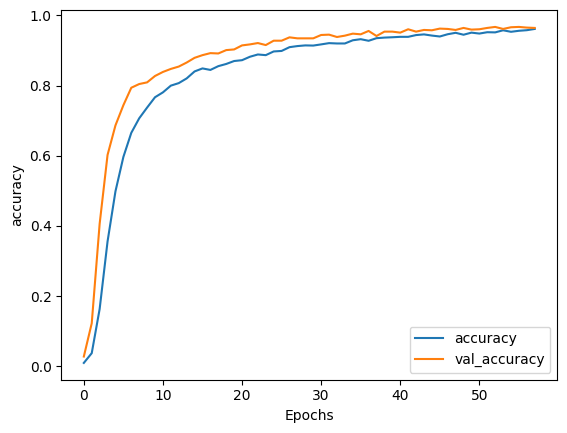

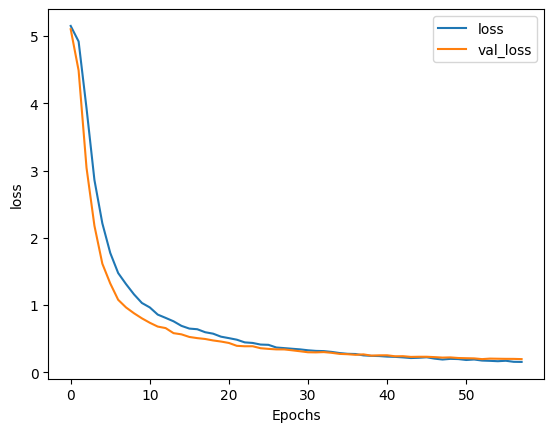

In [ ]:
def plot_graphs(history, string):
  plt.plot(history_ipa.history[string])
  plt.plot(history_ipa.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history_ipa, "accuracy")
plot_graphs(history_ipa, "loss")

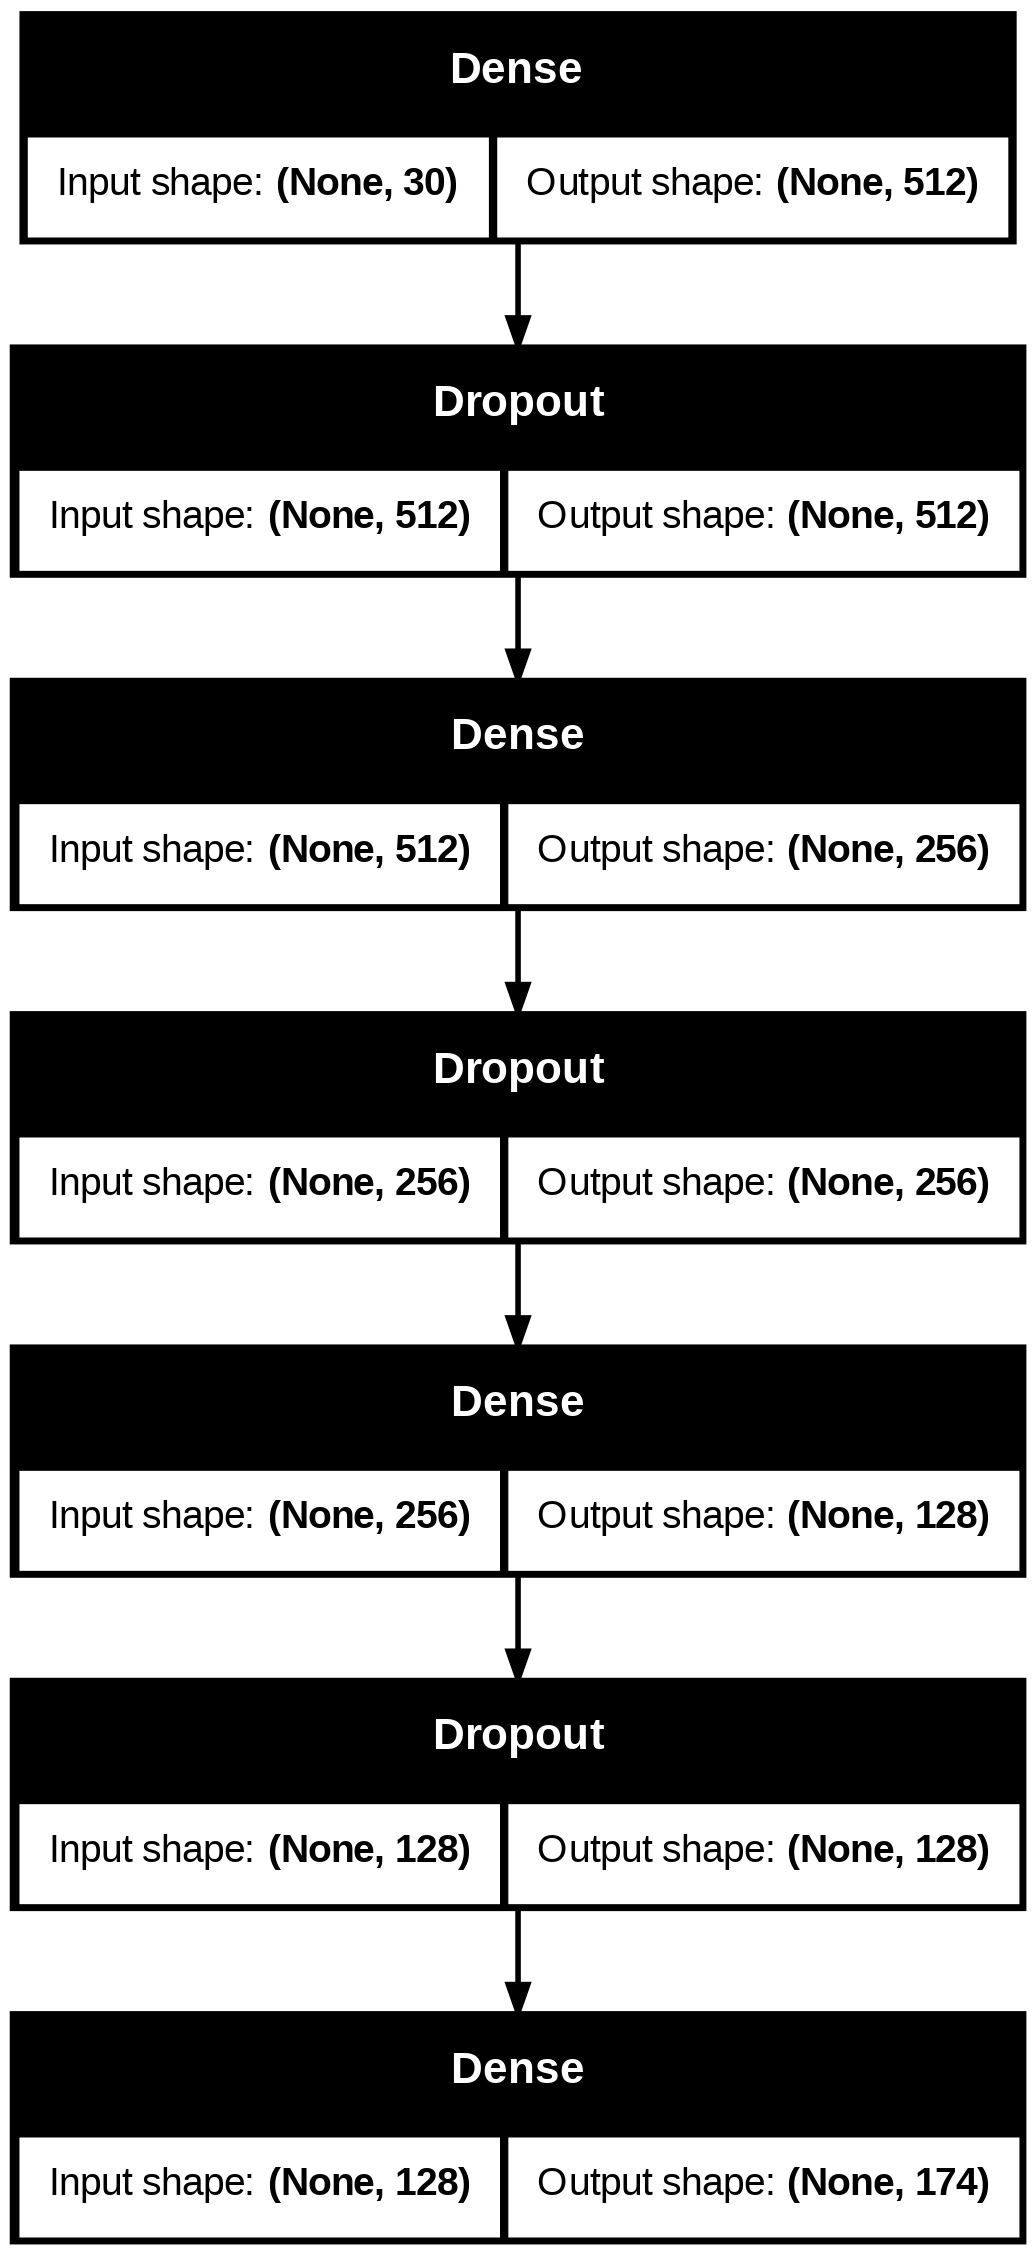

In [ ]:
#from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model_ipa, show_shapes=True, show_layer_names=False)

#Modelling (IPS)

In [ ]:
'''
model_ips = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=[35]),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(len(labels_ips.columns), activation='softmax')
])
'''
model_ips = tf.keras.Sequential([
  tf.keras.layers.Dense(256, activation='relu', input_shape=[35]),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(len(labels_ips.columns), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.8
)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)

In [ ]:
model_ips.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
model_ips.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_67 (Dense)                     │ (None, 256)                 │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 70)                  │          35,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 439,366 (1.68 MB)

 Trainable params: 439,366 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

In [ ]:
sm = SMOTE(k_neighbors=1)
X_train_res, y_train_res = sm.fit_resample(X_ips, y_ips)

In [ ]:
len(X_train_res)

490

In [ ]:
X_train_ips, X_test_ips, y_train_ips, y_test_ips = train_test_split(X_train_res, y_train_res, test_size=0.2, random_state=68)

In [ ]:
num_epochs = 1000
history_ips = model_ips.fit(X_train_ips, y_train_ips, epochs=num_epochs, validation_data=(X_test_ips, y_test_ips), verbose=1, callbacks=[early_stop], batch_size=50, shuffle=True)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.0159 - loss: 4.2764 - val_accuracy: 0.0102 - val_loss: 4.2775
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0223 - loss: 4.2233 - val_accuracy: 0.0102 - val_loss: 4.2706
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0215 - loss: 4.1892 - val_accuracy: 0.0102 - val_loss: 4.2644
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0404 - loss: 4.1477 - val_accuracy: 0.0306 - val_loss: 4.2552
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1058 - loss: 4.0480 - val_accuracy: 0.0816 - val_loss: 4.1622
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1542 - loss: 3.9942 - val_accuracy: 0.1633 - val_loss: 4.0230
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2124 - loss: 3.8121 - val_accuracy: 0.1531 - val_loss: 3.9053
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1975 - loss: 3.5865 - val_accuracy: 0.1837 - v

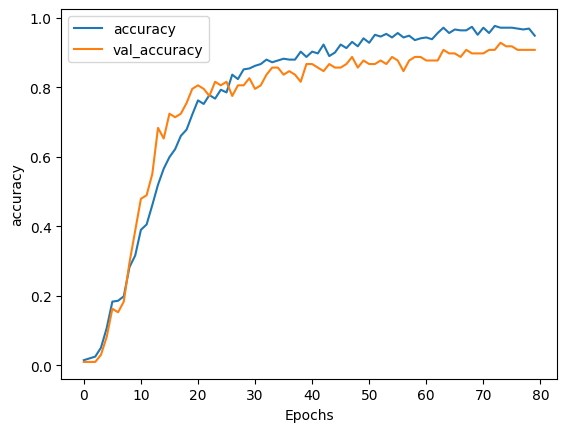

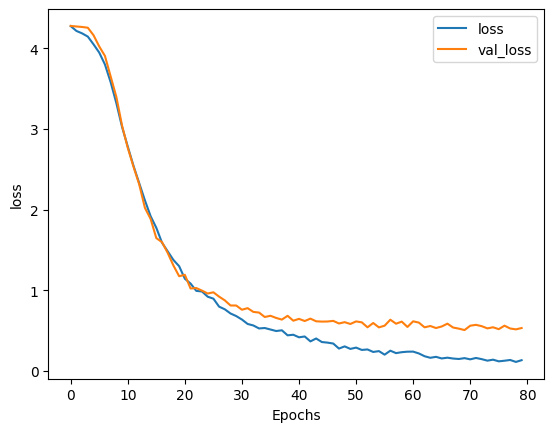

In [ ]:
def plot_graphs(history, string):
  plt.plot(history_ips.history[string])
  plt.plot(history_ips.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history_ips, "accuracy")
plot_graphs(history_ips, "loss")

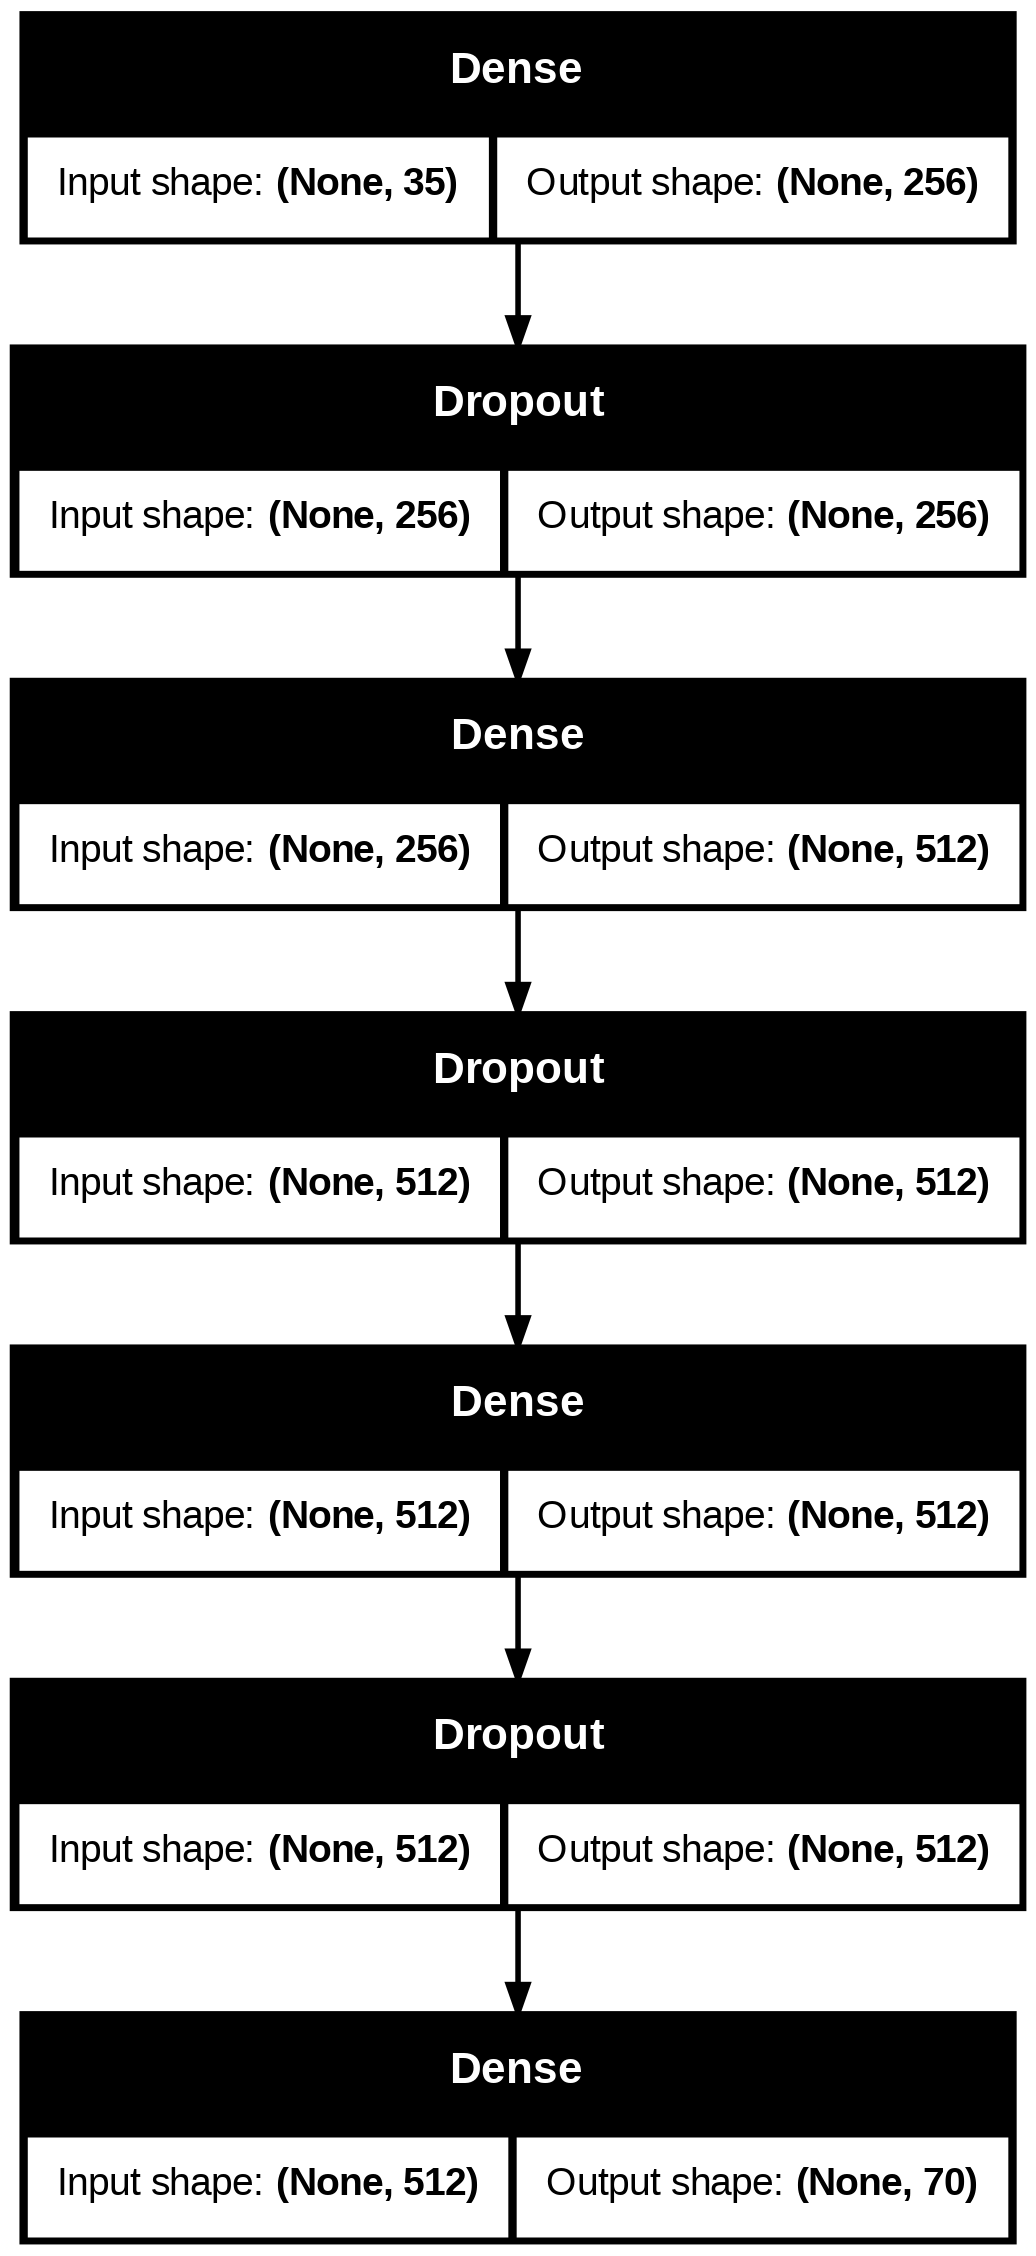

In [ ]:
#from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model_ips, show_shapes=True, show_layer_names=False)

# Model Evaluation (IPA)

In [ ]:
predicted_ipa = model_ipa.predict(X_test_ipa)
conf_matrix_ipa = confusion_matrix(y_test_ipa.argmax(axis=1),predicted_ipa.argmax(axis=1))
print(conf_matrix_ipa)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[ 7  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0  6]]


In [ ]:
y_test_ipa.argmax(axis=1)

array([138, 163, 144, ..., 125,  96, 107])

In [ ]:
predicted_ipa.argmax(axis=1)

array([138, 163, 144, ..., 125,  96, 107])

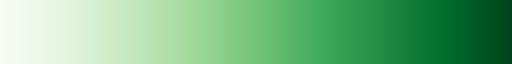

In [ ]:
plt.cm.Greens

<Axes: >

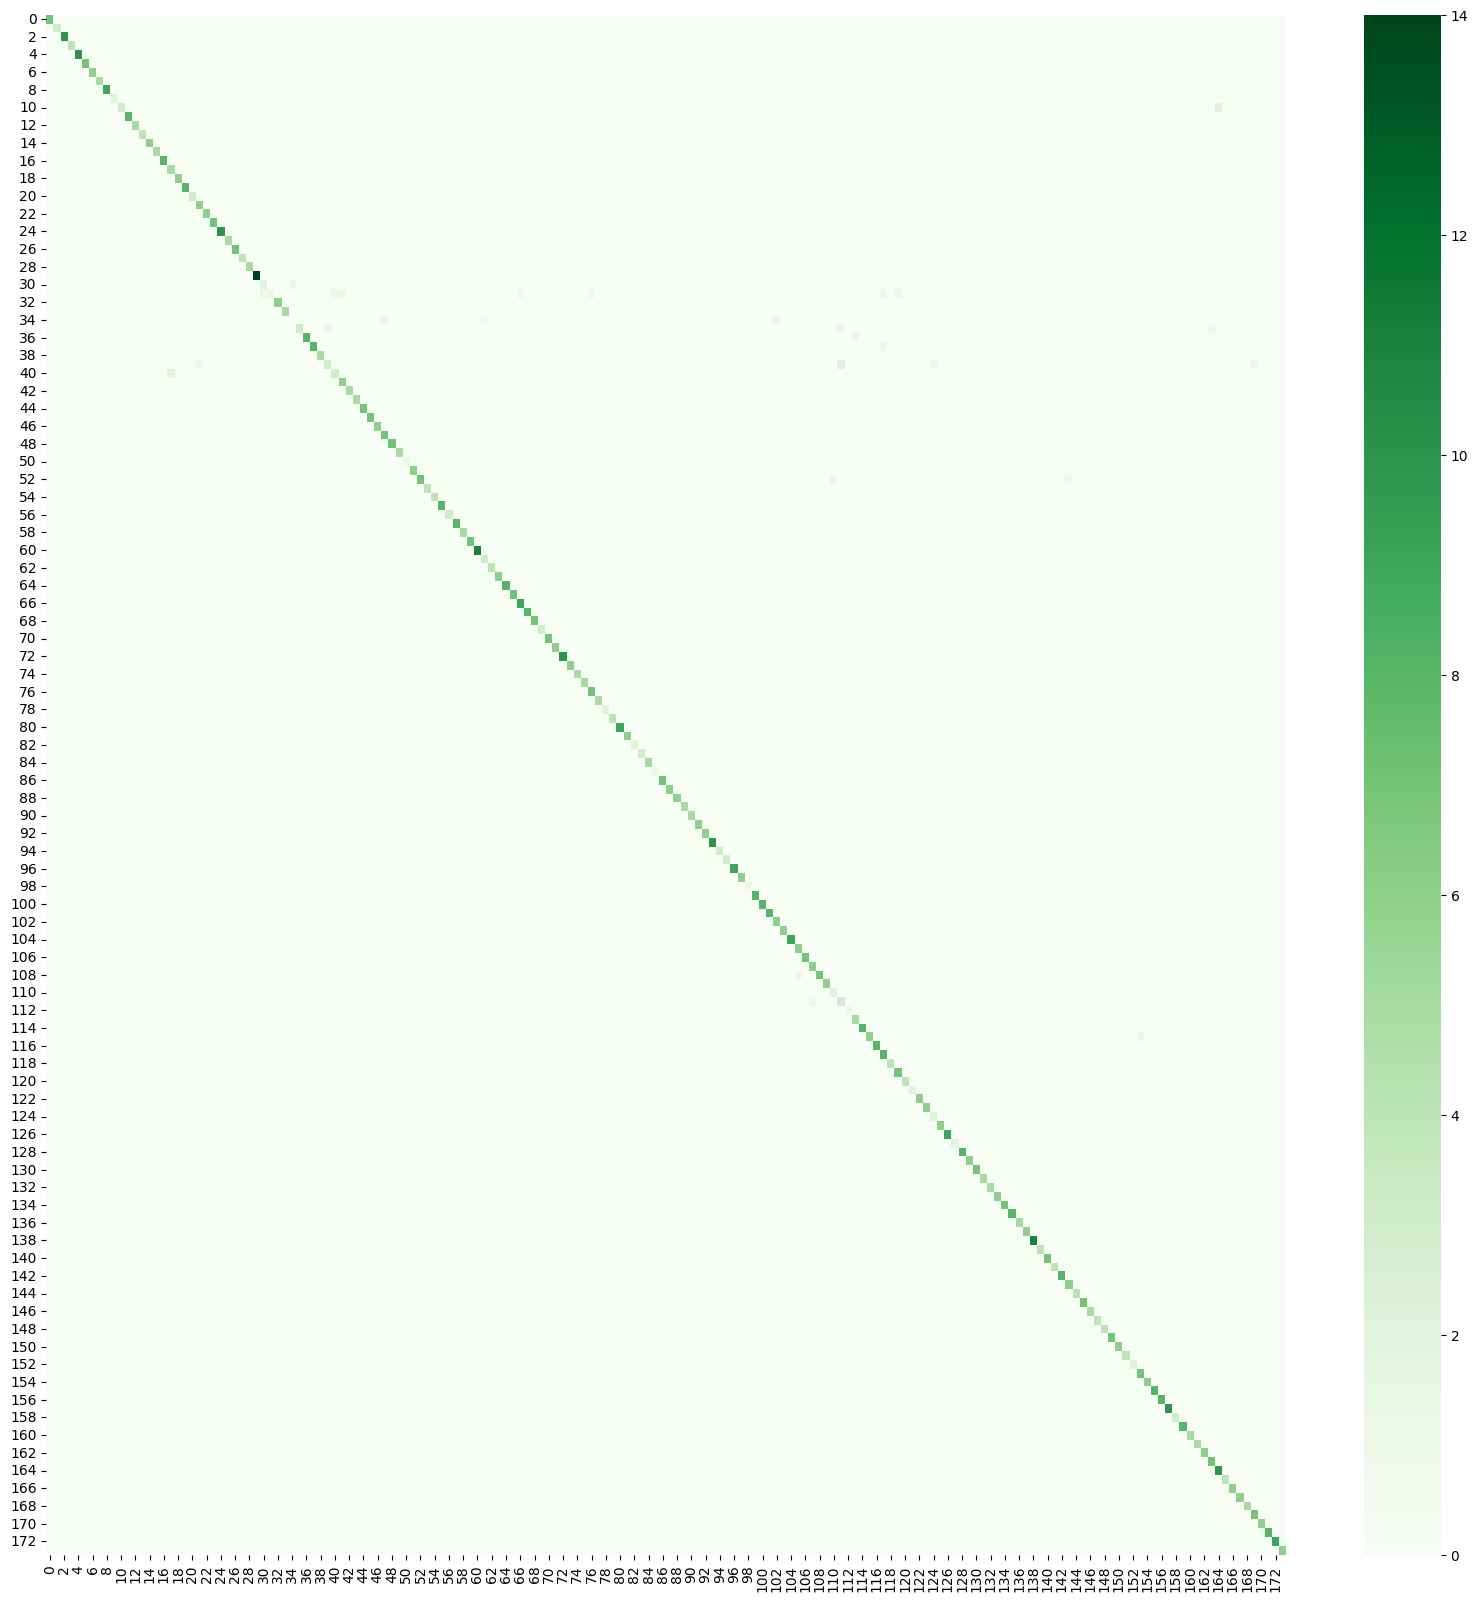

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(conf_matrix_ipa, annot=False, ax=ax, cmap="Greens")

In [ ]:
acc_ipa = accuracy_score(y_test_ipa.argmax(axis=1), predicted_ipa.argmax(axis=1))
acc_ipa

0.9712643678160919

In [ ]:
print(classification_report(y_test_ipa.argmax(axis=1),predicted_ipa.argmax(axis=1), labels=None, target_names=labels_ipa.columns, sample_weight=None, digits=4, output_dict=False, zero_division='warn'))

                                                                   precision    recall  f1-score   support

                                                 IPB - AGRIBISNIS     1.0000    1.0000    1.0000         7
                                  IPB - AGRONOMI DAN HORTIKULTURA     1.0000    1.0000    1.0000         3
                                         IPB - ARSITEKTUR LANSKAP     1.0000    1.0000    1.0000        10
                                                   IPB - BIOKIMIA     1.0000    1.0000    1.0000         4
                                                    IPB - BIOLOGI     1.0000    1.0000    1.0000        10
                              IPB - EKONOMI DAN STUDI PEMBANGUNAN     1.0000    1.0000    1.0000         7
                          IPB - EKONOMI SUMBERDAYA DAN LINGKUNGAN     1.0000    1.0000    1.0000         6
                                            IPB - EKONOMI SYARIAH     1.0000    1.0000    1.0000         5
                                IPB 

# Model Evaluation (IPS)

In [ ]:
predicted_ips = model_ips.predict(X_test_ips)
conf_matrix_ips = confusion_matrix(y_test_ips.argmax(axis=1),predicted_ips.argmax(axis=1))
print(conf_matrix_ips)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
y_test_ips.argmax(axis=1)

array([13, 31, 49, 21,  1, 66, 38, 50, 46, 55, 67, 16, 46, 60, 22, 59, 54,
       41, 38, 22, 69, 68, 42, 39, 51, 18, 36, 23, 53, 48, 55, 49, 20,  8,
       35, 32, 44, 57, 41, 37,  9, 42, 67, 68,  7, 33, 37,  5, 58, 64, 25,
        2, 38, 34, 24, 10, 43, 27, 50,  7, 26, 40,  7, 66, 52, 18, 12,  1,
       21, 32, 28, 56, 63,  3, 42,  0, 22,  3, 36, 19, 34, 25,  9, 51, 62,
       23, 45, 67,  0, 56, 40, 45, 34, 51,  9, 25, 22, 47])

In [ ]:
predicted_ips.argmax(axis=1)

array([13, 31, 49, 21,  1, 66, 38, 50, 46, 55, 22, 30, 46, 60, 22, 59, 54,
       64, 38, 22, 53, 68, 42, 39, 51, 18, 35, 23, 55, 48, 55, 49, 20, 11,
       35, 32, 44, 57, 41, 37,  9, 42, 67, 68,  7, 33, 37,  5, 61, 11, 25,
        2, 38, 34, 24, 10, 43, 27, 50,  7, 26, 40,  7, 66, 52, 18, 12,  1,
       21, 32, 28, 46, 63,  3, 42,  0, 22,  3, 36, 19, 34, 25,  9, 51, 62,
       23, 45, 67,  0, 56, 40, 45, 34, 51,  9, 25, 22, 47])

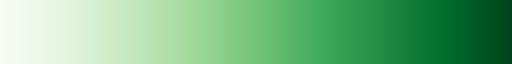

In [ ]:
plt.cm.Greens

<Axes: >

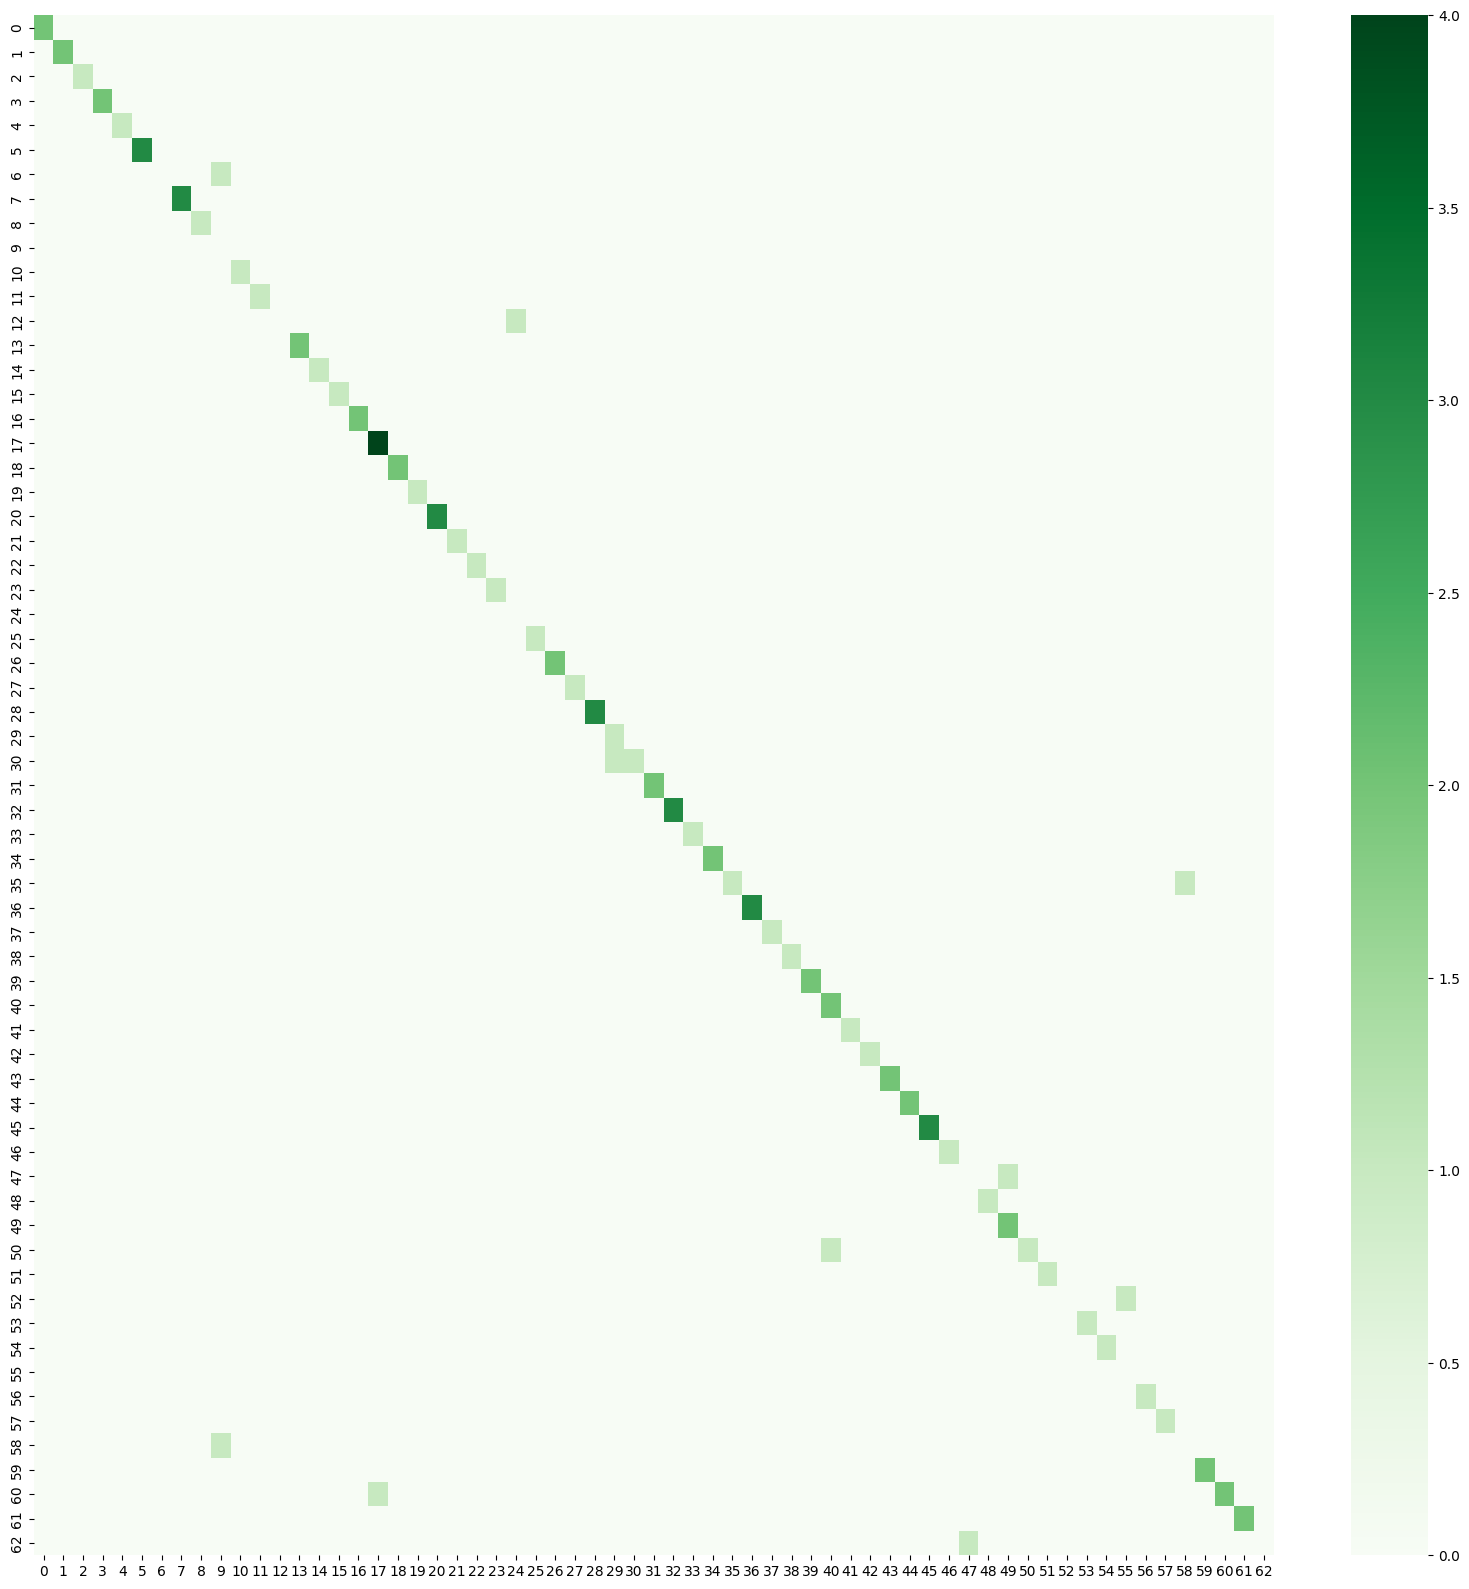

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(conf_matrix_ips, annot=False, ax=ax, cmap="Greens")

In [ ]:
acc_ips = accuracy_score(y_test_ips.argmax(axis=1), predicted_ips.argmax(axis=1))
acc_ips

0.8979591836734694

In [ ]:
print(classification_report(y_test_ips.argmax(axis=1),predicted_ips.argmax(axis=1), labels=None, target_names=None, sample_weight=None, digits=4, output_dict=False, zero_division='warn'))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         2
           1     1.0000    1.0000    1.0000         2
           2     1.0000    1.0000    1.0000         1
           3     1.0000    1.0000    1.0000         2
           5     1.0000    1.0000    1.0000         1
           7     1.0000    1.0000    1.0000         3
           8     0.0000    0.0000    0.0000         1
           9     1.0000    1.0000    1.0000         3
          10     1.0000    1.0000    1.0000         1
          11     0.0000    0.0000    0.0000         0
          12     1.0000    1.0000    1.0000         1
          13     1.0000    1.0000    1.0000         1
          16     0.0000    0.0000    0.0000         1
          18     1.0000    1.0000    1.0000         2
          19     1.0000    1.0000    1.0000         1
          20     1.0000    1.0000    1.0000         1
          21     1.0000    1.0000    1.0000         2
          22     0.8000    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.